# STEP 01 : Importing Python libraries :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
# pip install openpyxl 

# STEP 02 : Importing Dataset :

In [3]:
# data1 = pd.read_excel("staff utlz latest 16-17_masked.xlsx", header=None)
# data2 = pd.read_excel("staff utlz latest 17-18_masked.xlsx", header=None)
# data3 = pd.read_excel("Terminations 15-18.xlsx", header=None)

In [4]:
data1 = pd.read_excel("C:\\Users\\krish\\OneDrive\\Desktop\\Imarticus Working\\HR Analytics\\staff utlz latest 16-17_masked.xlsx", header=None)
data2 = pd.read_excel("C:\\Users\\krish\\OneDrive\\Desktop\\Imarticus Working\\HR Analytics\\staff utlz latest 17-18_masked.xlsx", header=None)
data3 = pd.read_excel("C:\\Users\\krish\\OneDrive\\Desktop\\Imarticus Working\\HR Analytics\\Terminations 15-18.xlsx", header=None)

In [5]:
data1.shape

(791, 115)

In [6]:
data2.shape

(975, 115)

In [7]:
data3.shape

(294, 9)

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month Year,Apr 2016,Apr 2016,Apr 2016,Apr 2016,Apr 2016,Apr 2016,Apr 2016,Apr 2016,May 2016,May 2016,May 2016,May 2016,May 2016,May 2016,May 2016,May 2016,Jun 2016,Jun 2016,Jun 2016,Jun 2016,Jun 2016,Jun 2016,Jun 2016,Jun 2016,Jul 2016,Jul 2016,Jul 2016,Jul 2016,Jul 2016,Jul 2016,Jul 2016,Jul 2016,Aug 2016,Aug 2016,Aug 2016,Aug 2016,Aug 2016,Aug 2016,Aug 2016,Aug 2016,Sep 2016,Sep 2016,Sep 2016,Sep 2016,Sep 2016,Sep 2016,Sep 2016,Sep 2016,Oct 2016,Oct 2016,Oct 2016,Oct 2016,Oct 2016,Oct 2016,Oct 2016,Oct 2016,Nov 2016,Nov 2016,Nov 2016,Nov 2016,Nov 2016,Nov 2016,Nov 2016,Nov 2016,Dec 2016,Dec 2016,Dec 2016,Dec 2016,Dec 2016,Dec 2016,Dec 2016,Dec 2016,Jan 2017,Jan 2017,Jan 2017,Jan 2017,Jan 2017,Jan 2017,Jan 2017,Jan 2017,Feb 2017,Feb 2017,Feb 2017,Feb 2017,Feb 2017,Feb 2017,Feb 2017,Feb 2017,Mar 2017,Mar 2017,Mar 2017,Mar 2017,Mar 2017,Mar 2017,Mar 2017,Mar 2017,Total,Total,Total,Total,Total,Total,Total,Total
1,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%
2,1,PC - 1,Rochette Jilleen,Level 2,Location 3,Client Service Staff,Level 1/2,Idalina Lauraine,2000-09-30 00:00:00,Active,-,168,160,55,8,0,102,0,0.34375,176,168,32,8,0,168,8,0.190476,176,152,12,24,0,44,0,0.078947,168,134,69,32,2,153,24,0.514925,184,168,20,16,0,84,0,0.119048,176,116,65,28,32,123,0,0.560345,168,150,53,12,6,91,0,0.353333,176,152,37,24,0,59,0,0.243421,176,136,84,40,0,126,0,0.617647,176,144,68,8,24,67,0,0.472222,160,147,49,8,5,114,0,0.333333,184,175,92,8,1,61,24,0.525714,2088,1802,636,216,70,1192,56,0.352941
3,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,1999-05-31 00:00:00,Active,-,168,152,54,8,8,44,74,0.355263,176,152,24,24,0,65,67,0.157895,176,172,86,4,0,47,50,0.5,168,144,27,8,16,63,79,0.1875,184,168,34,16,0,68,70,0.202381,176,138,26,12,26,61,66.5,0.188406,168,160,11,8,0,87,66,0.06875,176,160,28,16,0,70,73,0.175,176,136,54,40,0,41,41,0.397059,176,164,29,12,0,67,70,0.176829,160,152,0,8,0,76,76,0,184,184,182.5,0,0,5,1.5,0.991848,2088,1882,555.5,156,50,694,734,0.295165
4,3,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,2001-01-31 00:00:00,Active,-,168,144,59,

In [10]:
data2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month Year,2017-04-01 00:00:00,2017-04-01 00:00:00,2017-04-01 00:00:00,2017-04-01 00:00:00,2017-04-01 00:00:00,2017-04-01 00:00:00,2017-04-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-05-01 00:00:00,2017-05-01 00:00:00,2017-05-01 00:00:00,2017-05-01 00:00:00,2017-05-01 00:00:00,2017-05-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-06-01 00:00:00,2017-06-01 00:00:00,2017-06-01 00:00:00,2017-06-01 00:00:00,2017-06-01 00:00:00,2017-06-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-07-01 00:00:00,2017-07-01 00:00:00,2017-07-01 00:00:00,2017-07-01 00:00:00,2017-07-01 00:00:00,2017-07-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-08-01 00:00:00,2017-08-01 00:00:00,2017-08-01 00:00:00,2017-08-01 00:00:00,2017-08-01 00:00:00,2017-08-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-09-01 00:00:00,2017-09-01 00:00:00,2017-09-01 00:00:00,2017-09-01 00:00:00,2017-09-01 00:00:00,2017-09-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-10-01 00:00:00,2017-10-01 00:00:00,2017-10-01 00:00:00,2017-10-01 00:00:00,2017-10-01 00:00:00,2017-10-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-11-01 00:00:00,2017-11-01 00:00:00,2017-11-01 00:00:00,2017-11-01 00:00:00,2017-11-01 00:00:00,2017-11-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2017-12-01 00:00:00,2017-12-01 00:00:00,2017-12-01 00:00:00,2017-12-01 00:00:00,2017-12-01 00:00:00,2017-12-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-01-01 00:00:00,2018-01-01 00:00:00,2018-01-01 00:00:00,2018-01-01 00:00:00,2018-01-01 00:00:00,2018-01-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-02-01 00:00:00,2018-02-01 00:00:00,2018-02-01 00:00:00,2018-02-01 00:00:00,2018-02-01 00:00:00,2018-02-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-03-01 00:00:00,2018-03-01 00:00:00,2018-03-01 00:00:00,2018-03-01 00:00:00,2018-03-01 00:00:00,2018-03-01 00:00:00,2018-03-01 00:00:00,Total,Total,Total,Total,Total,Total,Total,Total
1,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%
2,1,PC - 1,Rochette Jilleen,Level 1,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,2000-09-30 00:00:00,Active,NaN

In [11]:
data3.head()

,0,1,2,3,4,5,6,7,8
0,Employee Number,Employee Name,YEAR of Birth,Gender,Leaving Reason,Previous Employer,Last Update Date,Latest Available Rating,Emp Ref.
1,4,Barbee Joey,1975,M,Career Growth,kadoo,2018-02-27 00:00:00,NaN,NaN
2,8,Kakalina Lorry,1980,F,Career Growth,cynoid,2017-02-17 00:00:00,3,NaN
3,11,Aili Nessy,1982,M,Career Growth,NaN,2017-01-12 00:00:00,2,NaN
4,15,Peria Maryjo,1979,M,Career Growth,flimbo,2016-09-15 00:00:00,3,NaN


In [12]:
# As data3 contains information of "Resigned" employees, hence it not usefull.

In [13]:
# Dataset headers :
header1 = data1.iloc[0]
header2 = data1.iloc[1]

header3 = data2.iloc[0]
header4 = data2.iloc[1]

In [14]:
headerData1 = []
for a,b in zip(header1, header2) :
    if(type(a)==float) :
        headerData1.append(b)
    elif(type(b)==float) :
        headerData1.append(a)
    else :
        c = str(a) + " " + str(b)
        headerData1.append(c)

In [15]:
headerData2 = []
for a,b in zip(header3, header4) :
    if(type(a)==float) :
        headerData2.append(b)
    elif(type(b)==float) :
        headerData2.append(a)
    else :
        c = str(a) + " " + str(b)
        headerData2.append(c)

In [16]:
data1.columns = headerData1
data2.columns = headerData2

In [17]:
data1 = data1.drop(data1.index[[0,1]])
# data1.head()

In [18]:
data2 = data2.drop(data2.index[[0,1]])
# data2.head()

# STEP 03 : Merging Two Datasets :

In [19]:
data = pd.merge(data1,data2, on="Employee No", how = "outer")

In [20]:
data.head()

,Employee No,Profit Center_x,Employee Name_x,Employee Position_x,Employee Location_x,People Group_x,Employee Category_x,Supervisor name_x,Join Date_x,Current Status_x,Month Year Termination Date_x,Apr 2016 Total Hours,Apr 2016 Total Available Hours,Apr 2016 Work Hours,Apr 2016 Leave Hours,Apr 2016 Training Hours,Apr 2016 BD Hours,Apr 2016 NC Hours,Apr 2016 Utilization%,May 2016 Total Hours,May 2016 Total Available Hours,May 2016 Work Hours,May 2016 Leave Hours,May 2016 Training Hours,May 2016 BD Hours,May 2016 NC Hours,May 2016 Utilization%,Jun 2016 Total Hours,Jun 2016 Total Available Hours,Jun 2016 Work Hours,Jun 2016 Leave Hours,Jun 2016 Training Hours,Jun 2016 BD Hours,Jun 2016 NC Hours,Jun 2016 Utilization%,Jul 2016 Total Hours,Jul 2016 Total Available Hours,Jul 2016 Work Hours,Jul 2016 Leave Hours,Jul 2016 Training Hours,Jul 2016 BD Hours,Jul 2016 NC Hours,Jul 2016 Utilization%,Aug 2016 Total Hours,Aug 2016 Total Available Hours,Aug 2016 Work Hours,Aug 2016 Leave Hours,Aug 2016 Training Hours,Aug 2016 BD Hours,Aug 2016 NC Hours,Aug 2016 Utilization%,Sep 2016 Total Hours,Sep 2016 Total Available Hours,Sep 2016 Work Hours,Sep 2016 Leave Hours,Sep 2016 Training Hours,Sep 2016 BD Hours,Sep 2016 NC Hours,Sep 2016 Utilization%,Oct 2016 Total Hours,Oct 2016 Total Available Hours,Oct 2016 Work Hours,Oct 2016 Leave Hours,Oct 2016 Training Hours,Oct 2016 BD Hours,Oct 2016 NC Hours,Oct 2016 Utilization%,Nov 2016 Total Hours,Nov 2016 Total Available Hours,Nov 2016 Work Hours,Nov 2016 Leave Hours,Nov 2016 Training Hours,Nov 2016 BD Hours,Nov 2016 NC Hours,Nov 2016 Utilization%,Dec 2016 Total Hours,Dec 2016 Total Available Hours,Dec 2016 Work Hours,Dec 2016 Leave Hours,Dec 2016 Training Hours,Dec 2016 BD Hours,Dec 2016 NC Hours,Dec 2016 Utilization%,Jan 2017 Total Hours,Jan 2017 Total Available Hours,Jan 2017 Work Hours,Jan 2017 Leave Hours,Jan 2017 Training Hours,Jan 2017 BD Hours,Jan 2017 NC Hours,Jan 2017 Utilization%,Feb 2017 Total Hours,Feb 2017 Total Available Hours,Feb 2017 Work Hours,Feb 2017 Leave Hours,Feb 2017 Training Hours,Feb 2017 BD Hours,Feb 2017 NC Hours,Feb 2017 Utilization%,Mar 2017 Total Hours,Mar 2017 Total Available Hours,Mar 2017 Work Hours,Mar 2017 Leave Hours,Mar 2017 Training Hours,Mar 2017 BD Hours,Mar 2017 NC Hours,Mar 2017 Utilization%,Total Total Hours_x,Total Total Available Hours_x,Total Work Hours_x,Total Leave Hours_x,Total Training Hours_x,Total BD Hours_x,Total NC Hours_x,Total Utilization%_x,Profit Center_y,Employee Name_y,Employee Position_y,Employee Location_y,People Group_y,Employee Category_y,Supervisor name_y,Join Date_y,Current Status_y,Month Year Termination Date_y,2017-04-01 00:00:00 Total Hours,2017-04-01 00:00:00 Total Available Hours,2017-04-01 00:00:00 Work Hours,2017-04-01 00:00:00 Leave Hours,2017-04-01 00:00:00 Training Hours,2017-04-01 00:00:00 BD Hours,2017-04-01 00:00:00 NC Hours,2017-04-01 00:00:00 Utilization%,2017-05-01 00:00:00 Total Hours,2017-05-01 00:00:00 Total Available Hours,2017-05-01 00:00:00 Work Hours,2017-05-01 00:00:00 Leave Hours,2017-05-01 00:00:00 Training Hours,2017-05-01 00:00:00 BD Hours,2017-05-01 00:00:00 NC Hours,2017-05-01 00:00:00 Utilization%,2017-06-01 00:00:00 Total Hours,2017-06-01 00:00:00 Total Available Hours,2017-06-01 00:00:00 Work Hours,2017-06-01 00:00:00 Leave Hours,2017-06-01 00:00:00 Training Hours,2017-06-01 00:00:00 BD Hours,2017-06-01 00:00:00 NC Hours,2017-06-01 00:00:00 Utilization%,2017-07-01 00:00:00 Total Hours,2017-07-01 00:00:00 Total Available Hours,2017-07-01 00:00:00 Work Hours,2017-07-01 00:00:00 Leave Hours,2017-07-01 00:00:00 Training Hours,2017-07-01 00:00:00 BD Hours,2017-07-01 00:00:00 NC Hours,2017-07-01 00:00:00 Utilization%,2017-08-01 00:00:00 Total Hours,2017-08-01 00:00:00 Total Available Hours,2017-08-01 00:00:00 Work Hours,2017-08-01 00:00:00 Leave Hours,2017-08-01 00:00:00 Training Hours,2017-08-01 00:00:00 BD Hours,2017-08-01 00:00:00 NC Hours,2017-08-01 00:00:00 Utilization%,2017-09-01 00:00:00 Total Hours,2017-

In [21]:
data.tail()

,Employee No,Profit Center_x,Employee Name_x,Employee Position_x,Employee Location_x,People Group_x,Employee Category_x,Supervisor name_x,Join Date_x,Current Status_x,Month Year Termination Date_x,Apr 2016 Total Hours,Apr 2016 Total Available Hours,Apr 2016 Work Hours,Apr 2016 Leave Hours,Apr 2016 Training Hours,Apr 2016 BD Hours,Apr 2016 NC Hours,Apr 2016 Utilization%,May 2016 Total Hours,May 2016 Total Available Hours,May 2016 Work Hours,May 2016 Leave Hours,May 2016 Training Hours,May 2016 BD Hours,May 2016 NC Hours,May 2016 Utilization%,Jun 2016 Total Hours,Jun 2016 Total Available Hours,Jun 2016 Work Hours,Jun 2016 Leave Hours,Jun 2016 Training Hours,Jun 2016 BD Hours,Jun 2016 NC Hours,Jun 2016 Utilization%,Jul 2016 Total Hours,Jul 2016 Total Available Hours,Jul 2016 Work Hours,Jul 2016 Leave Hours,Jul 2016 Training Hours,Jul 2016 BD Hours,Jul 2016 NC Hours,Jul 2016 Utilization%,Aug 2016 Total Hours,Aug 2016 Total Available Hours,Aug 2016 Work Hours,Aug 2016 Leave Hours,Aug 2016 Training Hours,Aug 2016 BD Hours,Aug 2016 NC Hours,Aug 2016 Utilization%,Sep 2016 Total Hours,Sep 2016 Total Available Hours,Sep 2016 Work Hours,Sep 2016 Leave Hours,Sep 2016 Training Hours,Sep 2016 BD Hours,Sep 2016 NC Hours,Sep 2016 Utilization%,Oct 2016 Total Hours,Oct 2016 Total Available Hours,Oct 2016 Work Hours,Oct 2016 Leave Hours,Oct 2016 Training Hours,Oct 2016 BD Hours,Oct 2016 NC Hours,Oct 2016 Utilization%,Nov 2016 Total Hours,Nov 2016 Total Available Hours,Nov 2016 Work Hours,Nov 2016 Leave Hours,Nov 2016 Training Hours,Nov 2016 BD Hours,Nov 2016 NC Hours,Nov 2016 Utilization%,Dec 2016 Total Hours,Dec 2016 Total Available Hours,Dec 2016 Work Hours,Dec 2016 Leave Hours,Dec 2016 Training Hours,Dec 2016 BD Hours,Dec 2016 NC Hours,Dec 2016 Utilization%,Jan 2017 Total Hours,Jan 2017 Total Available Hours,Jan 2017 Work Hours,Jan 2017 Leave Hours,Jan 2017 Training Hours,Jan 2017 BD Hours,Jan 2017 NC Hours,Jan 2017 Utilization%,Feb 2017 Total Hours,Feb 2017 Total Available Hours,Feb 2017 Work Hours,Feb 2017 Leave Hours,Feb 2017 Training Hours,Feb 2017 BD Hours,Feb 2017 NC Hours,Feb 2017 Utilization%,Mar 2017 Total Hours,Mar 2017 Total Available Hours,Mar 2017 Work Hours,Mar 2017 Leave Hours,Mar 2017 Training Hours,Mar 2017 BD Hours,Mar 2017 NC Hours,Mar 2017 Utilization%,Total Total Hours_x,Total Total Available Hours_x,Total Work Hours_x,Total Leave Hours_x,Total Training Hours_x,Total BD Hours_x,Total NC Hours_x,Total Utilization%_x,Profit Center_y,Employee Name_y,Employee Position_y,Employee Location_y,People Group_y,Employee Category_y,Supervisor name_y,Join Date_y,Current Status_y,Month Year Termination Date_y,2017-04-01 00:00:00 Total Hours,2017-04-01 00:00:00 Total Available Hours,2017-04-01 00:00:00 Work Hours,2017-04-01 00:00:00 Leave Hours,2017-04-01 00:00:00 Training Hours,2017-04-01 00:00:00 BD Hours,2017-04-01 00:00:00 NC Hours,2017-04-01 00:00:00 Utilization%,2017-05-01 00:00:00 Total Hours,2017-05-01 00:00:00 Total Available Hours,2017-05-01 00:00:00 Work Hours,2017-05-01 00:00:00 Leave Hours,2017-05-01 00:00:00 Training Hours,2017-05-01 00:00:00 BD Hours,2017-05-01 00:00:00 NC Hours,2017-05-01 00:00:00 Utilization%,2017-06-01 00:00:00 Total Hours,2017-06-01 00:00:00 Total Available Hours,2017-06-01 00:00:00 Work Hours,2017-06-01 00:00:00 Leave Hours,2017-06-01 00:00:00 Training Hours,2017-06-01 00:00:00 BD Hours,2017-06-01 00:00:00 NC Hours,2017-06-01 00:00:00 Utilization%,2017-07-01 00:00:00 Total Hours,2017-07-01 00:00:00 Total Available Hours,2017-07-01 00:00:00 Work Hours,2017-07-01 00:00:00 Leave Hours,2017-07-01 00:00:00 Training Hours,2017-07-01 00:00:00 BD Hours,2017-07-01 00:00:00 NC Hours,2017-07-01 00:00:00 Utilization%,2017-08-01 00:00:00 Total Hours,2017-08-01 00:00:00 Total Available Hours,2017-08-01 00:00:00 Work Hours,2017-08-01 00:00:00 Leave Hours,2017-08-01 00:00:00 Training Hours,2017-08-01 00:00:00 BD Hours,2017-08-01 00:00:00 NC Hours,2017-08-01 00:00:00 Utilization%,2017-09-01 00:00:00 Total Hours,2017-

In [22]:
# # Columns datatypes :
# data.dtypes

In [23]:
# list(data.columns)

In [24]:
data.describe()

,Employee No,Profit Center_x,Employee Name_x,Employee Position_x,Employee Location_x,People Group_x,Employee Category_x,Supervisor name_x,Join Date_x,Current Status_x,Month Year Termination Date_x,Apr 2016 Total Hours,Apr 2016 Total Available Hours,Apr 2016 Work Hours,Apr 2016 Leave Hours,Apr 2016 Training Hours,Apr 2016 BD Hours,Apr 2016 NC Hours,Apr 2016 Utilization%,May 2016 Total Hours,May 2016 Total Available Hours,May 2016 Work Hours,May 2016 Leave Hours,May 2016 Training Hours,May 2016 BD Hours,May 2016 NC Hours,May 2016 Utilization%,Jun 2016 Total Hours,Jun 2016 Total Available Hours,Jun 2016 Work Hours,Jun 2016 Leave Hours,Jun 2016 Training Hours,Jun 2016 BD Hours,Jun 2016 NC Hours,Jun 2016 Utilization%,Jul 2016 Total Hours,Jul 2016 Total Available Hours,Jul 2016 Work Hours,Jul 2016 Leave Hours,Jul 2016 Training Hours,Jul 2016 BD Hours,Jul 2016 NC Hours,Jul 2016 Utilization%,Aug 2016 Total Hours,Aug 2016 Total Available Hours,Aug 2016 Work Hours,Aug 2016 Leave Hours,Aug 2016 Training Hours,Aug 2016 BD Hours,Aug 2016 NC Hours,Aug 2016 Utilization%,Sep 2016 Total Hours,Sep 2016 Total Available Hours,Sep 2016 Work Hours,Sep 2016 Leave Hours,Sep 2016 Training Hours,Sep 2016 BD Hours,Sep 2016 NC Hours,Sep 2016 Utilization%,Oct 2016 Total Hours,Oct 2016 Total Available Hours,Oct 2016 Work Hours,Oct 2016 Leave Hours,Oct 2016 Training Hours,Oct 2016 BD Hours,Oct 2016 NC Hours,Oct 2016 Utilization%,Nov 2016 Total Hours,Nov 2016 Total Available Hours,Nov 2016 Work Hours,Nov 2016 Leave Hours,Nov 2016 Training Hours,Nov 2016 BD Hours,Nov 2016 NC Hours,Nov 2016 Utilization%,Dec 2016 Total Hours,Dec 2016 Total Available Hours,Dec 2016 Work Hours,Dec 2016 Leave Hours,Dec 2016 Training Hours,Dec 2016 BD Hours,Dec 2016 NC Hours,Dec 2016 Utilization%,Jan 2017 Total Hours,Jan 2017 Total Available Hours,Jan 2017 Work Hours,Jan 2017 Leave Hours,Jan 2017 Training Hours,Jan 2017 BD Hours,Jan 2017 NC Hours,Jan 2017 Utilization%,Feb 2017 Total Hours,Feb 2017 Total Available Hours,Feb 2017 Work Hours,Feb 2017 Leave Hours,Feb 2017 Training Hours,Feb 2017 BD Hours,Feb 2017 NC Hours,Feb 2017 Utilization%,Mar 2017 Total Hours,Mar 2017 Total Available Hours,Mar 2017 Work Hours,Mar 2017 Leave Hours,Mar 2017 Training Hours,Mar 2017 BD Hours,Mar 2017 NC Hours,Mar 2017 Utilization%,Total Total Hours_x,Total Total Available Hours_x,Total Work Hours_x,Total Leave Hours_x,Total Training Hours_x,Total BD Hours_x,Total NC Hours_x,Total Utilization%_x,Profit Center_y,Employee Name_y,Employee Position_y,Employee Location_y,People Group_y,Employee Category_y,Supervisor name_y,Join Date_y,Current Status_y,Month Year Termination Date_y,2017-04-01 00:00:00 Total Hours,2017-04-01 00:00:00 Total Available Hours,2017-04-01 00:00:00 Work Hours,2017-04-01 00:00:00 Leave Hours,2017-04-01 00:00:00 Training Hours,2017-04-01 00:00:00 BD Hours,2017-04-01 00:00:00 NC Hours,2017-04-01 00:00:00 Utilization%,2017-05-01 00:00:00 Total Hours,2017-05-01 00:00:00 Total Available Hours,2017-05-01 00:00:00 Work Hours,2017-05-01 00:00:00 Leave Hours,2017-05-01 00:00:00 Training Hours,2017-05-01 00:00:00 BD Hours,2017-05-01 00:00:00 NC Hours,2017-05-01 00:00:00 Utilization%,2017-06-01 00:00:00 Total Hours,2017-06-01 00:00:00 Total Available Hours,2017-06-01 00:00:00 Work Hours,2017-06-01 00:00:00 Leave Hours,2017-06-01 00:00:00 Training Hours,2017-06-01 00:00:00 BD Hours,2017-06-01 00:00:00 NC Hours,2017-06-01 00:00:00 Utilization%,2017-07-01 00:00:00 Total Hours,2017-07-01 00:00:00 Total Available Hours,2017-07-01 00:00:00 Work Hours,2017-07-01 00:00:00 Leave Hours,2017-07-01 00:00:00 Training Hours,2017-07-01 00:00:00 BD Hours,2017-07-01 00:00:00 NC Hours,2017-07-01 00:00:00 Utilization%,2017-08-01 00:00:00 Total Hours,2017-08-01 00:00:00 Total Available Hours,2017-08-01 00:00:00 Work Hours,2017-08-01 00:00:00 Leave Hours,2017-08-01 00:00:00 Training Hours,2017-08-01 00:00:00 BD Hours,2017-08-01 00:00:00 NC Hours,2017-08-01 00:00:00 Utilization%,2017-09-01 00:00:00 Total Hours,2017-

In [25]:
# # Missing Values :
# data.isnull().sum()

## Changing colnames :

#### Latest Current Status :

In [26]:
data["Latest Current Status"] = 0
for i in range(data.shape[0]) :
    if(pd.isnull(data["Current Status_y"][i])) :
        data["Latest Current Status"][i] = data["Current Status_x"][i]
    else :
        data["Latest Current Status"][i] = data["Current Status_y"][i]

data["Latest Current Status"].isnull().sum()

0

In [27]:
data = data.drop("Current Status_x", axis = 1)
data = data.drop("Current Status_y", axis = 1)

#### Employee Name :

In [28]:
# Removing Insignificant Columns :
data = data.drop("Employee Name_x", axis = 1)
data = data.drop("Employee Name_y", axis = 1)

#### Latest Employee Position :

In [29]:
data["Latest Employee Position"] = 0
for i in range(data.shape[0]) :
    if(pd.isnull(data["Employee Position_y"][i])) :
        data["Latest Employee Position"][i] = data["Employee Position_x"][i]
    else :
        data["Latest Employee Position"][i] = data["Employee Position_y"][i]
data["Latest Employee Position"].isnull().sum()

0

In [30]:
data = data.drop("Employee Position_x", axis = 1)
data = data.drop("Employee Position_y", axis = 1)

#### Latest Profit Center :

In [31]:
data["Latest Profit Center"] = 0
for i in range(data.shape[0]) :
    if(pd.isnull(data["Profit Center_y"][i])) :
        data["Latest Profit Center"][i] = data["Profit Center_x"][i]
    else :
        data["Latest Profit Center"][i] = data["Profit Center_y"][i]

data["Latest Profit Center"].isnull().sum()

0

In [32]:
data = data.drop("Profit Center_x", axis = 1)
data = data.drop("Profit Center_y", axis = 1)

#### Latest Employee Location :

In [33]:
data["Latest Employee Location"] = 0
for i in range(data.shape[0]) :
    if(pd.isnull(data["Employee Location_y"][i])) :
        data["Latest Employee Location"][i] = data["Employee Location_x"][i]
    else :
        data["Latest Employee Location"][i] = data["Employee Location_y"][i]

data["Latest Employee Location"].isnull().sum()

0

In [34]:
data = data.drop("Employee Location_x", axis = 1)
data = data.drop("Employee Location_y", axis = 1)

#### Latest People Group :

In [35]:
data["Latest People Group"] = 0
for i in range(data.shape[0]) :
    if(pd.isnull(data["People Group_y"][i])) :
        data["Latest People Group"][i] = data["People Group_x"][i]
    else :
        data["Latest People Group"][i] = data["People Group_y"][i]

data["Latest People Group"].isnull().sum()

0

In [36]:
data = data.drop("People Group_x", axis = 1)
data = data.drop("People Group_y", axis = 1)

#### Latest Employee Category :

In [37]:
data["Latest Employee Category"] = 0
for i in range(data.shape[0]) :
    if(pd.isnull(data["Employee Category_y"][i])) :
        data["Latest Employee Category"][i] = data["Employee Category_x"][i]
    else :
        data["Latest Employee Category"][i] = data["Employee Category_y"][i]

data["Latest Employee Category"].isnull().sum()

0

In [38]:
data = data.drop("Employee Category_x", axis = 1)
data = data.drop("Employee Category_y", axis = 1)

#### Latest Supervisor name :

In [39]:
data["Latest Supervisor name"] = 0
for i in range(data.shape[0]) :
    if(pd.isnull(data["Supervisor name_y"][i])) :
        data["Latest Supervisor name"][i] = data["Supervisor name_x"][i]
    else :
        data["Latest Supervisor name"][i] = data["Supervisor name_y"][i]

data["Latest Supervisor name"].isnull().sum()

0

In [40]:
data = data.drop("Supervisor name_x", axis = 1)
data = data.drop("Supervisor name_y", axis = 1)

#### Join Date :

In [41]:
data["Join Date"] = 0
for i in range(data.shape[0]) :
    if(pd.isnull(data["Join Date_y"][i])) :
        data["Join Date"][i] = data["Join Date_x"][i]
    else :
        data["Join Date"][i] = data["Join Date_y"][i]

data["Join Date"].isnull().sum()

0

In [42]:
data = data.drop("Join Date_x", axis = 1)
data = data.drop("Join Date_y", axis = 1)

#### Termination Date :

In [43]:
# Repalcing "-" with Null Value :
data["Month Year Termination Date_x"].replace(to_replace="-", value=np.nan, inplace=True)
data["Month Year Termination Date_x"].isnull().sum()

970

In [44]:
data["Month Year Termination Date_y"].isnull().sum()

966

In [45]:
data["Termination Date"] = 0
for i in range(data.shape[0]) :
    if(pd.isnull(data["Month Year Termination Date_y"][i])) :
        data["Termination Date"][i] = data["Month Year Termination Date_x"][i]
    else :
        data["Termination Date"][i] = data["Month Year Termination Date_y"][i]

data["Termination Date"].isnull().sum()

834

In [46]:
data = data.drop("Month Year Termination Date_x", axis = 1)
data = data.drop("Month Year Termination Date_y", axis = 1)

#### Overall Total Hours :

In [47]:
a = data["Total Total Hours_x"].min()
b = data["Total Total Hours_x"].max()
print(f"Minimum Value is : {a} and Maximum value is  : {b}")

Minimum Value is : 0 and Maximum value is  : 2088


In [48]:
a = data["Total Total Hours_y"].min()
b = data["Total Total Hours_y"].max()
print(f"Minimum Value is : {a} and Maximum value is  : {b}")

Minimum Value is : 0 and Maximum value is  : 2080


In [49]:
data["Overall Total Hours"] = 0
for i in range(data.shape[0]) :
    if(pd.isnull(data["Total Total Hours_x"][i])) :
        data["Overall Total Hours"][i] = pd.to_numeric(data["Total Total Hours_y"][i])
    elif(pd.isnull(data["Total Total Hours_y"][i])) :
        data["Overall Total Hours"][i] = pd.to_numeric(data["Total Total Hours_x"][i])
    else :
        data["Overall Total Hours"][i] = pd.to_numeric(data["Total Total Hours_x"][i]) + pd.to_numeric(data["Total Total Hours_y"][i])

data["Overall Total Hours"].isnull().sum()

0

In [50]:
data = data.drop("Total Total Hours_x", axis = 1)
data = data.drop("Total Total Hours_y", axis = 1)

#### Overall Total Available Hours :

In [51]:
a = data["Total Total Available Hours_x"].min()
b = data["Total Total Available Hours_x"].max()
print(f"Minimum Value is : {a} and Maximum value is  : {b}")

Minimum Value is : 0 and Maximum value is  : 2088


In [52]:
a = data["Total Total Available Hours_y"].min()
b = data["Total Total Available Hours_y"].max()
print(f"Minimum Value is : {a} and Maximum value is  : {b}")

Minimum Value is : -40 and Maximum value is  : 2080


In [53]:
data["Total Total Available Hours_y"][data["Total Total Available Hours_y"]<0] = 0

In [54]:
data["Overall Total Available Hours"] = 0
for i in range(data.shape[0]) :
    if(pd.isnull(data["Total Total Available Hours_x"][i])) :
        data["Overall Total Available Hours"][i] = pd.to_numeric(data["Total Total Available Hours_y"][i])
    elif(pd.isnull(data["Total Total Available Hours_y"][i])) :
        data["Overall Total Available Hours"][i] = pd.to_numeric(data["Total Total Available Hours_x"][i])
    else :
        data["Overall Total Available Hours"][i] = pd.to_numeric(data["Total Total Available Hours_x"][i]) + pd.to_numeric(data["Total Total Available Hours_y"][i])

data["Overall Total Available Hours"].isnull().sum()

0

In [55]:
data = data.drop("Total Total Available Hours_x", axis = 1)
data = data.drop("Total Total Available Hours_y", axis = 1)

#### Overall Total Work Hours :

In [56]:
a = data["Total Work Hours_x"].min()
b = data["Total Work Hours_x"].max()
print(f"Minimum Value is : {a} and Maximum value is  : {b}")

Minimum Value is : 0 and Maximum value is  : 2413


In [57]:
a = data["Total Work Hours_y"].min()
b = data["Total Work Hours_y"].max()
print(f"Minimum Value is : {a} and Maximum value is  : {b}")

Minimum Value is : -42 and Maximum value is  : 2669


In [58]:
data["Total Work Hours_y"][data["Total Work Hours_y"]<0] = 0

In [59]:
data["Overall Total Work Hours"] = 0
for i in range(data.shape[0]) :
    if(pd.isnull(data["Total Work Hours_x"][i])) :
        data["Overall Total Work Hours"][i] = pd.to_numeric(data["Total Work Hours_y"][i])
    elif(pd.isnull(data["Total Work Hours_y"][i])) :
        data["Overall Total Work Hours"][i] = pd.to_numeric(data["Total Work Hours_x"][i])
    else :
        data["Overall Total Work Hours"][i] = pd.to_numeric(data["Total Work Hours_x"][i]) + pd.to_numeric(data["Total Work Hours_y"][i])

data["Overall Total Work Hours"].isnull().sum()

0

In [60]:
data = data.drop("Total Work Hours_x", axis = 1)
data = data.drop("Total Work Hours_y", axis = 1)

#### Overall Total Leave Hours :

In [61]:
a = data["Total Leave Hours_x"].min()
b = data["Total Leave Hours_x"].max()
print(f"Minimum Value is : {a} and Maximum value is  : {b}")

Minimum Value is : 0 and Maximum value is  : 1576


In [62]:
a = data["Total Leave Hours_y"].min()
b = data["Total Leave Hours_y"].max()
print(f"Minimum Value is : {a} and Maximum value is  : {b}")

Minimum Value is : 0 and Maximum value is  : 2080


In [63]:
data["Overall Total Leave Hours"] = 0
for i in range(data.shape[0]) :
    if(pd.isnull(data["Total Leave Hours_x"][i])) :
        data["Overall Total Leave Hours"][i] = pd.to_numeric(data["Total Leave Hours_y"][i])
    elif(pd.isnull(data["Total Leave Hours_y"][i])) :
        data["Overall Total Leave Hours"][i] = pd.to_numeric(data["Total Leave Hours_x"][i])
    else :
        data["Overall Total Leave Hours"][i] = pd.to_numeric(data["Total Leave Hours_x"][i]) + pd.to_numeric(data["Total Leave Hours_y"][i])

data["Overall Total Leave Hours"].isnull().sum()

0

In [64]:
data = data.drop("Total Leave Hours_x", axis = 1)
data = data.drop("Total Leave Hours_y", axis = 1)

#### Overall Total Training Hours :

In [65]:
a = data["Total Training Hours_x"].min()
b = data["Total Training Hours_x"].max()
print(f"Minimum Value is : {a} and Maximum value is  : {b}")

Minimum Value is : -11 and Maximum value is  : 169


In [66]:
a = data["Total Training Hours_y"].min()
b = data["Total Training Hours_y"].max()
print(f"Minimum Value is : {a} and Maximum value is  : {b}")

Minimum Value is : 0 and Maximum value is  : 150


In [67]:
data["Total Training Hours_x"][data["Total Training Hours_x"]<0] = 0

In [68]:
data["Overall Total Training Hours"] = 0
for i in range(data.shape[0]) :
    if(pd.isnull(data["Total Training Hours_x"][i])) :
        data["Overall Total Training Hours"][i] = pd.to_numeric(data["Total Training Hours_y"][i])
    elif(pd.isnull(data["Total Training Hours_y"][i])) :
        data["Overall Total Training Hours"][i] = pd.to_numeric(data["Total Training Hours_x"][i])
    else :
        data["Overall Total Training Hours"][i] = pd.to_numeric(data["Total Training Hours_x"][i]) + pd.to_numeric(data["Total Training Hours_y"][i])

data["Overall Total Training Hours"].isnull().sum()

0

In [69]:
data = data.drop("Total Training Hours_x", axis = 1)
data = data.drop("Total Training Hours_y", axis = 1)

#### Overall Total BD Hours :

In [70]:
a = data["Total BD Hours_x"].min()
b = data["Total BD Hours_x"].max()
print(f"Minimum Value is : {a} and Maximum value is  : {b}")

Minimum Value is : -24 and Maximum value is  : 1876


In [71]:
data["Total BD Hours_x"][data["Total BD Hours_x"]<0] = 0

In [72]:
a = data["Total BD Hours_y"].min()
b = data["Total BD Hours_y"].max()
print(f"Minimum Value is : {a} and Maximum value is  : {b}")

Minimum Value is : 0 and Maximum value is  : 2015


In [73]:
data["Overall Total BD Hours"] = 0
for i in range(data.shape[0]) :
    if(pd.isnull(data["Total BD Hours_x"][i])) :
        data["Overall Total BD Hours"][i] = pd.to_numeric(data["Total BD Hours_y"][i])
    elif(pd.isnull(data["Total BD Hours_y"][i])) :
        data["Overall Total BD Hours"][i] = pd.to_numeric(data["Total BD Hours_x"][i])
    else :
        data["Overall Total BD Hours"][i] = pd.to_numeric(data["Total BD Hours_x"][i]) + pd.to_numeric(data["Total BD Hours_y"][i])

data["Overall Total BD Hours"].isnull().sum()

0

In [74]:
data = data.drop("Total BD Hours_x", axis = 1)
data = data.drop("Total BD Hours_y", axis = 1)

#### Overall Total NC Hours :

In [75]:
a = data["Total NC Hours_x"].min()
b = data["Total NC Hours_x"].max()
print(f"Minimum Value is : {a} and Maximum value is  : {b}")

Minimum Value is : -28.5 and Maximum value is  : 2458.5


In [76]:
data["Total NC Hours_x"][data["Total NC Hours_x"]<0] = 0

In [77]:
a = data["Total NC Hours_y"].min()
b = data["Total NC Hours_y"].max()
print(f"Minimum Value is : {a} and Maximum value is  : {b}")

Minimum Value is : -8 and Maximum value is  : 2257


In [78]:
data["Total NC Hours_y"][data["Total NC Hours_y"]<0] = 0

In [79]:
data["Overall Total NC Hours"] = 0
for i in range(data.shape[0]) :
    if(pd.isnull(data["Total NC Hours_x"][i])) :
        data["Overall Total NC Hours"][i] = pd.to_numeric(data["Total NC Hours_y"][i])
    elif(pd.isnull(data["Total NC Hours_y"][i])) :
        data["Overall Total NC Hours"][i] = pd.to_numeric(data["Total NC Hours_x"][i])
    else :
        data["Overall Total NC Hours"][i] = pd.to_numeric(data["Total NC Hours_x"][i]) + pd.to_numeric(data["Total NC Hours_y"][i])

data["Overall Total NC Hours"].isnull().sum()

0

In [80]:
data = data.drop("Total NC Hours_x", axis = 1)
data = data.drop("Total NC Hours_y", axis = 1)

#### Overall Total Utilization% :

In [81]:
data["Overall Total Utilization%"] = 0
for i in range(data.shape[0]) :
    if(data["Overall Total Available Hours"][i] == 0) :
        data["Overall Total Utilization%"][i] = 0
    else :
        data["Overall Total Utilization%"][i] = (data["Overall Total Work Hours"][i]/data["Overall Total Available Hours"][i])*100

data["Overall Total Utilization%"].isnull().sum()

0

In [82]:
data = data.drop("Total Utilization%_x", axis = 1)
data = data.drop("Total Utilization%_y", axis = 1)

In [83]:
# data["Overall Total Utilization%"][data["Overall Total Utilization%"]>100]

#### Removing Monthwise data :

In [84]:
# Merged dataset is like Yearly report, hence we remove Month-wise data.

In [85]:
rows = data.shape[0]
print((data.isnull().sum()/rows)*100)

Employee No                                   0.000000
Apr 2016 Total Hours                         28.982898
Apr 2016 Total Available Hours               28.982898
Apr 2016 Work Hours                          28.982898
Apr 2016 Leave Hours                         28.982898
Apr 2016 Training Hours                      28.982898
Apr 2016 BD Hours                            28.982898
Apr 2016 NC Hours                            28.982898
Apr 2016 Utilization%                        28.982898
May 2016 Total Hours                         28.982898
May 2016 Total Available Hours               28.982898
May 2016 Work Hours                          28.982898
May 2016 Leave Hours                         28.982898
May 2016 Training Hours                      28.982898
May 2016 BD Hours                            28.982898
May 2016 NC Hours                            28.982898
May 2016 Utilization%                        28.982898
Jun 2016 Total Hours                         28.982898
Jun 2016 T

In [86]:
drop_col = data[['Apr 2016 Total Hours',
                     'Apr 2016 Total Available Hours',
                     'Apr 2016 Work Hours',
                     'Apr 2016 Leave Hours',
                     'Apr 2016 Training Hours',
                     'Apr 2016 BD Hours',
                     'Apr 2016 NC Hours',
                     'Apr 2016 Utilization%',
                     'May 2016 Total Hours',
                     'May 2016 Total Available Hours',
                     'May 2016 Work Hours',
                     'May 2016 Leave Hours',
                     'May 2016 Training Hours',
                     'May 2016 BD Hours',
                     'May 2016 NC Hours',
                     'May 2016 Utilization%',
                     'Jun 2016 Total Hours',
                     'Jun 2016 Total Available Hours',
                     'Jun 2016 Work Hours',
                     'Jun 2016 Leave Hours',
                     'Jun 2016 Training Hours',
                     'Jun 2016 BD Hours',
                     'Jun 2016 NC Hours',
                     'Jun 2016 Utilization%',
                     'Jul 2016 Total Hours',
                     'Jul 2016 Total Available Hours',
                     'Jul 2016 Work Hours',
                     'Jul 2016 Leave Hours',
                     'Jul 2016 Training Hours',
                     'Jul 2016 BD Hours',
                     'Jul 2016 NC Hours',
                     'Jul 2016 Utilization%',
                     'Aug 2016 Total Hours',
                     'Aug 2016 Total Available Hours',
                     'Aug 2016 Work Hours',
                     'Aug 2016 Leave Hours',
                     'Aug 2016 Training Hours',
                     'Aug 2016 BD Hours',
                     'Aug 2016 NC Hours',
                     'Aug 2016 Utilization%',
                     'Sep 2016 Total Hours',
                     'Sep 2016 Total Available Hours',
                     'Sep 2016 Work Hours',
                     'Sep 2016 Leave Hours',
                     'Sep 2016 Training Hours',
                     'Sep 2016 BD Hours',
                     'Sep 2016 NC Hours',
                     'Sep 2016 Utilization%',
                     'Oct 2016 Total Hours',
                     'Oct 2016 Total Available Hours',
                     'Oct 2016 Work Hours',
                     'Oct 2016 Leave Hours',
                     'Oct 2016 Training Hours',
                     'Oct 2016 BD Hours',
                     'Oct 2016 NC Hours',
                     'Oct 2016 Utilization%',
                     'Nov 2016 Total Hours',
                     'Nov 2016 Total Available Hours',
                     'Nov 2016 Work Hours',
                     'Nov 2016 Leave Hours',
                     'Nov 2016 Training Hours',
                     'Nov 2016 BD Hours',
                     'Nov 2016 NC Hours',
                     'Nov 2016 Utilization%',
                     'Dec 2016 Total Hours',
                     'Dec 2016 Total Available Hours',
                     'Dec 2016 Work Hours',
                     'Dec 2016 Leave Hours',
                     'Dec 2016 Training Hours',
                     'Dec 2016 BD Hours',
                     'Dec 2016 NC Hours',
                     'Dec 2016 Utilization%',
                     'Jan 2017 Total Hours',
                     'Jan 2017 Total Available Hours',
                     'Jan 2017 Work Hours',
                     'Jan 2017 Leave Hours',
                     'Jan 2017 Training Hours',
                     'Jan 2017 BD Hours',
                     'Jan 2017 NC Hours',
                     'Jan 2017 Utilization%',
                     'Feb 2017 Total Hours',
                     'Feb 2017 Total Available Hours',
                     'Feb 2017 Work Hours',
                     'Feb 2017 Leave Hours',
                     'Feb 2017 Training Hours',
                     'Feb 2017 BD Hours',
                     'Feb 2017 NC Hours',
                     'Feb 2017 Utilization%',
                     'Mar 2017 Total Hours',
                     'Mar 2017 Total Available Hours',
                     'Mar 2017 Work Hours',
                     'Mar 2017 Leave Hours',
                     'Mar 2017 Training Hours',
                     'Mar 2017 BD Hours',
                     'Mar 2017 NC Hours',
                     'Mar 2017 Utilization%',
    
                     '2017-04-01 00:00:00 Total Hours',
                     '2017-04-01 00:00:00 Total Available Hours',
                     '2017-04-01 00:00:00 Work Hours',
                     '2017-04-01 00:00:00 Leave Hours',
                     '2017-04-01 00:00:00 Training Hours',
                     '2017-04-01 00:00:00 BD Hours',
                     '2017-04-01 00:00:00 NC Hours',
                     '2017-04-01 00:00:00 Utilization%',
                     '2017-05-01 00:00:00 Total Hours',
                     '2017-05-01 00:00:00 Total Available Hours',
                     '2017-05-01 00:00:00 Work Hours',
                     '2017-05-01 00:00:00 Leave Hours',
                     '2017-05-01 00:00:00 Training Hours',
                     '2017-05-01 00:00:00 BD Hours',
                     '2017-05-01 00:00:00 NC Hours',
                     '2017-05-01 00:00:00 Utilization%',
                     '2017-06-01 00:00:00 Total Hours',
                     '2017-06-01 00:00:00 Total Available Hours',
                     '2017-06-01 00:00:00 Work Hours',
                     '2017-06-01 00:00:00 Leave Hours',
                     '2017-06-01 00:00:00 Training Hours',
                     '2017-06-01 00:00:00 BD Hours',
                     '2017-06-01 00:00:00 NC Hours',
                     '2017-06-01 00:00:00 Utilization%',
                     '2017-07-01 00:00:00 Total Hours',
                     '2017-07-01 00:00:00 Total Available Hours',
                     '2017-07-01 00:00:00 Work Hours',
                     '2017-07-01 00:00:00 Leave Hours',
                     '2017-07-01 00:00:00 Training Hours',
                     '2017-07-01 00:00:00 BD Hours',
                     '2017-07-01 00:00:00 NC Hours',
                     '2017-07-01 00:00:00 Utilization%',
                     '2017-08-01 00:00:00 Total Hours',
                     '2017-08-01 00:00:00 Total Available Hours',
                     '2017-08-01 00:00:00 Work Hours',
                     '2017-08-01 00:00:00 Leave Hours',
                     '2017-08-01 00:00:00 Training Hours',
                     '2017-08-01 00:00:00 BD Hours',
                     '2017-08-01 00:00:00 NC Hours',
                     '2017-08-01 00:00:00 Utilization%',
                     '2017-09-01 00:00:00 Total Hours',
                     '2017-09-01 00:00:00 Total Available Hours',
                     '2017-09-01 00:00:00 Work Hours',
                     '2017-09-01 00:00:00 Leave Hours',
                     '2017-09-01 00:00:00 Training Hours',
                     '2017-09-01 00:00:00 BD Hours',
                     '2017-09-01 00:00:00 NC Hours',
                     '2017-09-01 00:00:00 Utilization%',
                     '2017-10-01 00:00:00 Total Hours',
                     '2017-10-01 00:00:00 Total Available Hours',
                     '2017-10-01 00:00:00 Work Hours',
                     '2017-10-01 00:00:00 Leave Hours',
                     '2017-10-01 00:00:00 Training Hours',
                     '2017-10-01 00:00:00 BD Hours',
                     '2017-10-01 00:00:00 NC Hours',
                     '2017-10-01 00:00:00 Utilization%',
                     '2017-11-01 00:00:00 Total Hours',
                     '2017-11-01 00:00:00 Total Available Hours',
                     '2017-11-01 00:00:00 Work Hours',
                     '2017-11-01 00:00:00 Leave Hours',
                     '2017-11-01 00:00:00 Training Hours',
                     '2017-11-01 00:00:00 BD Hours',
                     '2017-11-01 00:00:00 NC Hours',
                     '2017-11-01 00:00:00 Utilization%',
                     '2017-12-01 00:00:00 Total Hours',
                     '2017-12-01 00:00:00 Total Available Hours',
                     '2017-12-01 00:00:00 Work Hours',
                     '2017-12-01 00:00:00 Leave Hours',
                     '2017-12-01 00:00:00 Training Hours',
                     '2017-12-01 00:00:00 BD Hours',
                     '2017-12-01 00:00:00 NC Hours',
                     '2017-12-01 00:00:00 Utilization%',
                     '2018-01-01 00:00:00 Total Hours',
                     '2018-01-01 00:00:00 Total Available Hours',
                     '2018-01-01 00:00:00 Work Hours',
                     '2018-01-01 00:00:00 Leave Hours',
                     '2018-01-01 00:00:00 Training Hours',
                     '2018-01-01 00:00:00 BD Hours',
                     '2018-01-01 00:00:00 NC Hours',
                     '2018-01-01 00:00:00 Utilization%',
                     '2018-02-01 00:00:00 Total Hours',
                     '2018-02-01 00:00:00 Total Available Hours',
                     '2018-02-01 00:00:00 Work Hours',
                     '2018-02-01 00:00:00 Leave Hours',
                     '2018-02-01 00:00:00 Training Hours',
                     '2018-02-01 00:00:00 BD Hours',
                     '2018-02-01 00:00:00 NC Hours',
                     '2018-02-01 00:00:00 Utilization%',
                     '2018-03-01 00:00:00 Total Hours',
                     '2018-03-01 00:00:00 Total Available Hours',
                     '2018-03-01 00:00:00 Work Hours',
                     '2018-03-01 00:00:00 Leave Hours',
                     '2018-03-01 00:00:00 Training Hours',
                     '2018-03-01 00:00:00 BD Hours',
                     '2018-03-01 00:00:00 NC Hours',
                     '2018-03-01 00:00:00 Utilization%']]
drop_col.head()

,Apr 2016 Total Hours,Apr 2016 Total Available Hours,Apr 2016 Work Hours,Apr 2016 Leave Hours,Apr 2016 Training Hours,Apr 2016 BD Hours,Apr 2016 NC Hours,Apr 2016 Utilization%,May 2016 Total Hours,May 2016 Total Available Hours,May 2016 Work Hours,May 2016 Leave Hours,May 2016 Training Hours,May 2016 BD Hours,May 2016 NC Hours,May 2016 Utilization%,Jun 2016 Total Hours,Jun 2016 Total Available Hours,Jun 2016 Work Hours,Jun 2016 Leave Hours,Jun 2016 Training Hours,Jun 2016 BD Hours,Jun 2016 NC Hours,Jun 2016 Utilization%,Jul 2016 Total Hours,Jul 2016 Total Available Hours,Jul 2016 Work Hours,Jul 2016 Leave Hours,Jul 2016 Training Hours,Jul 2016 BD Hours,Jul 2016 NC Hours,Jul 2016 Utilization%,Aug 2016 Total Hours,Aug 2016 Total Available Hours,Aug 2016 Work Hours,Aug 2016 Leave Hours,Aug 2016 Training Hours,Aug 2016 BD Hours,Aug 2016 NC Hours,Aug 2016 Utilization%,Sep 2016 Total Hours,Sep 2016 Total Available Hours,Sep 2016 Work Hours,Sep 2016 Leave Hours,Sep 2016 Training Hours,Sep 2016 BD Hours,Sep 2016 NC Hours,Sep 2016 Utilization%,Oct 2016 Total Hours,Oct 2016 Total Available Hours,Oct 2016 Work Hours,Oct 2016 Leave Hours,Oct 2016 Training Hours,Oct 2016 BD Hours,Oct 2016 NC Hours,Oct 2016 Utilization%,Nov 2016 Total Hours,Nov 2016 Total Available Hours,Nov 2016 Work Hours,Nov 2016 Leave Hours,Nov 2016 Training Hours,Nov 2016 BD Hours,Nov 2016 NC Hours,Nov 2016 Utilization%,Dec 2016 Total Hours,Dec 2016 Total Available Hours,Dec 2016 Work Hours,Dec 2016 Leave Hours,Dec 2016 Training Hours,Dec 2016 BD Hours,Dec 2016 NC Hours,Dec 2016 Utilization%,Jan 2017 Total Hours,Jan 2017 Total Available Hours,Jan 2017 Work Hours,Jan 2017 Leave Hours,Jan 2017 Training Hours,Jan 2017 BD Hours,Jan 2017 NC Hours,Jan 2017 Utilization%,Feb 2017 Total Hours,Feb 2017 Total Available Hours,Feb 2017 Work Hours,Feb 2017 Leave Hours,Feb 2017 Training Hours,Feb 2017 BD Hours,Feb 2017 NC Hours,Feb 2017 Utilization%,Mar 2017 Total Hours,Mar 2017 Total Available Hours,Mar 2017 Work Hours,Mar 2017 Leave Hours,Mar 2017 Training Hours,Mar 2017 BD Hours,Mar 2017 NC Hours,Mar 2017 Utilization%,2017-04-01 00:00:00 Total Hours,2017-04-01 00:00:00 Total Available Hours,2017-04-01 00:00:00 Work Hours,2017-04-01 00:00:00 Leave Hours,2017-04-01 00:00:00 Training Hours,2017-04-01 00:00:00 BD Hours,2017-04-01 00:00:00 NC Hours,2017-04-01 00:00:00 Utilization%,2017-05-01 00:00:00 Total Hours,2017-05-01 00:00:00 Total Available Hours,2017-05-01 00:00:00 Work Hours,2017-05-01 00:00:00 Leave Hours,2017-05-01 00:00:00 Training Hours,2017-05-01 00:00:00 BD Hours,2017-05-01 00:00:00 NC Hours,2017-05-01 00:00:00 Utilization%,2017-06-01 00:00:00 Total Hours,2017-06-01 00:00:00 Total Available Hours,2017-06-01 00:00:00 Work Hours,2017-06-01 00:00:00 Leave Hours,2017-06-01 00:00:00 Training Hours,2017-06-01 00:00:00 BD Hours,2017-06-01 00:00:00 NC Hours,2017-06-01 00:00:00 Utilization%,2017-07-01 00:00:00 Total Hours,2017-07-01 00:00:00 Total Available Hours,2017-07-01 00:00:00 Work Hours,2017-07-01 00:00:00 Leave Hours,2017-07-01 00:00:00 Training Hours,2017-07-01 00:00:00 BD Hours,2017-07-01 00:00:00 NC Hours,2017-07-01 00:00:00 Utilization%,2017-08-01 00:00:00 Total Hours,2017-08-01 00:00:00 Total Available Hours,2017-08-01 00:00:00 Work Hours,2017-08-01 00:00:00 Leave Hours,2017-08-01 00:00:00 Training Hours,2017-08-01 00:00:00 BD Hours,2017-08-01 00:00:00 NC Hours,2017-08-01 00:00:00 Utilization%,2017-09-01 00:00:00 Total Hours,2017-09-01 00:00:00 Total Available Hours,2017-09-01 00:00:00 Work Hours,2017-09-01 00:00:00 Leave Hours,2017-09-01 00:00:00 Training Hours,2017-09-01 00:00:00 BD Hours,2017-09-01 00:00:00 NC Hours,2017-09-01 00:00:00 Utilization%,2017-10-01 00:00:00 Total Hours,2017-10-01 00:00:00 Total Available Hours,2017-10-01 00:00:00 Work Hours,2017-10-01 00:00:00 Leave Hours,2017-10-01 00:00:00 Training Hours,2017-10-01 00:00:00 BD Hours,2017-10-01 00:00:00 NC Hours,2017-10-01 00:00:00 Utilization%,2017-11-01 00:00:00 Total Hours,2017-11-01 00:00:00 Total 

In [87]:
data = data.drop(drop_col.columns, axis = 1)
list(data.columns)

['Employee No',
 'Latest Current Status',
 'Latest Employee Position',
 'Latest Profit Center',
 'Latest Employee Location',
 'Latest People Group',
 'Latest Employee Category',
 'Latest Supervisor name',
 'Join Date',
 'Termination Date',
 'Overall Total Hours',
 'Overall Total Available Hours',
 'Overall Total Work Hours',
 'Overall Total Leave Hours',
 'Overall Total Training Hours',
 'Overall Total BD Hours',
 'Overall Total NC Hours',
 'Overall Total Utilization%']

# STEP 04 : Data Preparation :

#### Latest Current Status :

In [88]:
data["Latest Current Status"].value_counts()

Active        799
Resigned      277
New Joiner     24
Secondment      9
Sabbatical      2
Name: Latest Current Status, dtype: int64

In [89]:
# Converting "New Joiner", "Secondment" & "Sabbatical" into one level - "Active" :
data["Latest Current Status"].replace(to_replace="New Joiner", value="Active", inplace=True)
data["Latest Current Status"].replace(to_replace="Secondment", value="Active", inplace=True)
data["Latest Current Status"].replace(to_replace="Sabbatical", value="Active", inplace=True)
data["Latest Current Status"].value_counts()

Active      834
Resigned    277
Name: Latest Current Status, dtype: int64

In [90]:
data["Latest Current Status"].dtype
# Object Type

dtype('O')

#### Latest Employee Position  :

In [91]:
data["Latest Employee Position"].value_counts()

Level 7     360
Level 8     318
Level 6     233
Level 5     100
Level 4      49
Level 3      20
Level 2      11
-             9
Level A2      3
Level A3      3
Level A1      2
Level 1       2
Level 10      1
Name: Latest Employee Position, dtype: int64

In [92]:
# Repalcing "-" with Mode Value :
mod_Val = data["Latest Employee Position"].mode()[0]
data["Latest Employee Position"].replace(to_replace="-", value=mod_Val, inplace=True)

In [93]:
data["Latest Employee Position"].value_counts()

Level 7     369
Level 8     318
Level 6     233
Level 5     100
Level 4      49
Level 3      20
Level 2      11
Level A2      3
Level A3      3
Level A1      2
Level 1       2
Level 10      1
Name: Latest Employee Position, dtype: int64

#### Latest Supervisor name :

In [94]:
data["Latest Supervisor name"].value_counts()

Cacilia Aimee          20
Hedi Elna              20
Tallia Eyde            18
Jolyn Briney           16
Myrtie Brana           16
-                      16
Orsa Margeaux          16
Lindy Marguerite       15
Jillian Lorelei        15
Trenna Mureil          15
Guenevere Florida      14
Terza Gwyn             14
Dottie Bidget          14
Kynthia Hildy          14
Tiena Hatti            14
Ali Elsinore           14
Douglas Herrera        13
Nikolia Shirl          13
Laetitia Yoshi         13
Rosabella Arlina       13
Frances Mignonne       13
Daryl Natalina         12
Annnora Gabrielle      12
Gert Editha            12
Nerita Anet            12
Ophelie Jyoti          12
Marys Essy             11
Lenora Nydia           11
Orelee Hanna           11
Tatiana Roxanna        11
Misti Helena           11
Josey Rorie            11
Lian Harley            11
Aimil Latisha          11
Danette Melinda        11
Revkah Stephie         10
Kalindi Toma           10
Cherise Lainey         10
Imelda Madal

In [95]:
# Repalcing "-" with Mode Value :
data["Latest Supervisor name"].replace(to_replace="-", value=np.nan, inplace=True)

In [96]:
data["Latest Supervisor name"].isnull().sum()

16

In [97]:
cat_data = data[[ 'Latest Current Status',
 'Latest Employee Position',
 'Latest Profit Center',
 'Latest Employee Location',
 'Latest People Group',
 'Latest Employee Category']]
cat_data.head()

,Latest Current Status,Latest Employee Position,Latest Profit Center,Latest Employee Location,Latest People Group,Latest Employee Category
0,Active,Level 1,PC - 1,Location 3,Client Service Staff,SVP/VP
1,Active,Level 2,PC - 2,Location 7,Client Service Staff,SVP/VP
2,Active,Level 2,PC - 2,Location 7,Client Service Staff,SVP/VP
3,Resigned,Level 2,PC - 3,Location 1,Client Service Staff,Resigned
4,Active,Level 1,PC - 4,Location 3,Client Service Staff,Level 1/2


In [98]:
cat_data.dtypes

Latest Current Status       object
Latest Employee Position    object
Latest Profit Center        object
Latest Employee Location    object
Latest People Group         object
Latest Employee Category    object
dtype: object

In [99]:
cat_data=pd.get_dummies(data=cat_data,drop_first=True)
cat_data.head()

,Latest Current Status_Resigned,Latest Employee Position_Level 10,Latest Employee Position_Level 2,Latest Employee Position_Level 3,Latest Employee Position_Level 4,Latest Employee Position_Level 5,Latest Employee Position_Level 6,Latest Employee Position_Level 7,Latest Employee Position_Level 8,Latest Employee Position_Level A1,Latest Employee Position_Level A2,Latest Employee Position_Level A3,Latest Profit Center_PC - 10,Latest Profit Center_PC - 11,Latest Profit Center_PC - 2,Latest Profit Center_PC - 3,Latest Profit Center_PC - 4,Latest Profit Center_PC - 5,Latest Profit Center_PC - 6,Latest Profit Center_PC - 7,Latest Profit Center_PC - 8,Latest Profit Center_PC - 9,Latest Employee Location_Location 2,Latest Employee Location_Location 3,Latest Employee Location_Location 4,Latest Employee Location_Location 5,Latest Employee Location_Location 6,Latest Employee Location_Location 7,Latest Employee Location_Location 8,Latest Employee Location_Location 9,Latest People Group_Support Staff,Latest Employee Category_Confirmed Staff,Latest Employee Category_Confirmed Staff (Part-Time 4 Hours),Latest Employee Category_Confirmed Staff (Part-Time 6 Hours),Latest Employee Category_Confirmed-Sabbatical,Latest Employee Category_Fixed term Staff,Latest Employee Category_Level 1/2,Latest Employee Category_Resigned,Latest Employee Category_SVP/VP,Latest Employee Category_Secondee-Outward-Without Pay,Latest Employee Category_Serving Notice Period,Latest Employee Category_Staff on Probation
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [100]:
x_train = cat_data[-data["Latest Supervisor name"].isnull()]
x_test = cat_data[data["Latest Supervisor name"].isnull()]
y_train = data["Latest Supervisor name"][-data["Latest Supervisor name"].isnull()]
y_test = data["Latest Supervisor name"][data["Latest Supervisor name"].isnull()]

In [101]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred1 = clf.predict(x_test)
clf.score(x_train,y_train)

0.3406392694063927

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred2 = knn.predict(x_test)
knn.score(x_train,y_train)

0.2410958904109589

In [103]:
data["Latest Supervisor name"][data["Latest Supervisor name"].isnull()] = y_pred1

In [104]:
data["Latest Supervisor name"].isnull().sum()

0

#### Join Date & Termination Date : (Tenure)

In [105]:
# convert the 'Joint Date' column to datetime format :
data["Join Date"]= pd.to_datetime(data["Join Date"])

In [106]:
data["Termination Date"].isnull().sum()

834

In [107]:
# Repalcing "NULL" with End Date :
date = "01-04-2018"
data["Termination Date"].fillna(value=date, inplace=True)
data["Termination Date"].isnull().sum()

0

In [108]:
data["Termination Date"].dtype

dtype('O')

In [109]:
# convert the 'Termination Date' column to datetime format :
data["Termination Date"] = pd.to_datetime(data["Termination Date"])

In [110]:
# Variable Name : Tenure
data["Tenure"] = pd.DatetimeIndex(data["Termination Date"]).year-pd.DatetimeIndex(data["Join Date"]).year
data["Tenure"].head()

0    18
1    19
2    17
3    18
4    20
Name: Tenure, dtype: int64

In [111]:
data = data.drop("Join Date", axis = 1)
data = data.drop("Termination Date", axis = 1)

#### Employee No :

In [112]:
data["Employee No"] =  pd.to_numeric(data["Employee No"])

In [113]:
list(data.columns)

['Employee No',
 'Latest Current Status',
 'Latest Employee Position',
 'Latest Profit Center',
 'Latest Employee Location',
 'Latest People Group',
 'Latest Employee Category',
 'Latest Supervisor name',
 'Overall Total Hours',
 'Overall Total Available Hours',
 'Overall Total Work Hours',
 'Overall Total Leave Hours',
 'Overall Total Training Hours',
 'Overall Total BD Hours',
 'Overall Total NC Hours',
 'Overall Total Utilization%',
 'Tenure']

### Overview of Data :

In [114]:
# data.shape
print(f"Dataset has {data.shape[0]} rows and {data.shape[1]} coumns.")

Dataset has 1111 rows and 17 coumns.


In [115]:
# Column-Names and datatypes :
data.dtypes

Employee No                       int64
Latest Current Status            object
Latest Employee Position         object
Latest Profit Center             object
Latest Employee Location         object
Latest People Group              object
Latest Employee Category         object
Latest Supervisor name           object
Overall Total Hours               int64
Overall Total Available Hours     int64
Overall Total Work Hours          int64
Overall Total Leave Hours         int64
Overall Total Training Hours      int64
Overall Total BD Hours            int64
Overall Total NC Hours            int64
Overall Total Utilization%        int64
Tenure                            int64
dtype: object

In [116]:
# Missing Values :
print(f"Dataset has {data.isnull().sum().sum()} missing values.")

Dataset has 0 missing values.


# STEP 05 : Identification Of Target Variable :

In [117]:
# Column "Latest Current Status" is a Target Variable.

In [118]:
m = data["Latest Current Status"].isnull().sum()

In [119]:
print(f"Target variable has {m} missing values.")

Target variable has 0 missing values.


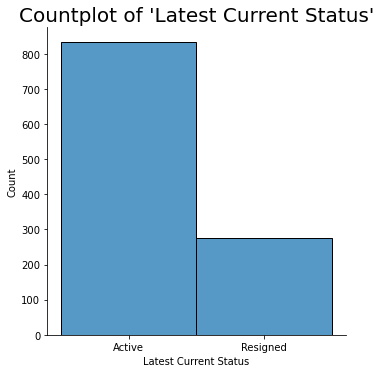

In [120]:
sns.displot(data=data, x="Latest Current Status")
plt.title("Countplot of 'Latest Current Status'", fontsize=20)
plt.show()

In [121]:
# data["Latest Current Status"].value_counts()

In [122]:
a = (data[data['Latest Current Status'] == 'Active'].shape[0])
b = (data[data['Latest Current Status'] == 'Resigned'].shape[0])
print(f"Total No. of 'Active' Employee : {a}")
print(f"Total No. of 'Resigned' Employee : {b}")

Total No. of 'Active' Employee : 834
Total No. of 'Resigned' Employee : 277


In [123]:
a = (data[data['Latest Current Status'] == 'Active'].shape[0] / data.shape[0])*100
b = (data[data['Latest Current Status'] == 'Resigned'].shape[0] / data.shape[0])*100
a = round(a, 2)
b = round(b, 2)
print(f"Percentage of 'Active' Employee : {a} %")
print(f"Percentage of 'Resigned' Employee : {b} %")

Percentage of 'Active' Employee : 75.07 %
Percentage of 'Resigned' Employee : 24.93 %


In [124]:
# As shown on the chart above, we see this is an imbalanced class problem. 
# Indeed, the percentage of "Active" Employees in our dataset is 75.07 % and the percentage of "Resigned" Employees is 24.93 %.

# STEP 06 : Relationship Between Target Variable with Other Variables :

#### Employee Position :

In [125]:
# cross_tab_per = pd.crosstab(data["Latest Employee Position"],data["Latest Current Status"],  normalize='index').round(4)*100
# cross_tab_per

In [126]:
cross_tab = pd.crosstab(data["Latest Employee Position"],data["Latest Current Status"])
# cross_tab

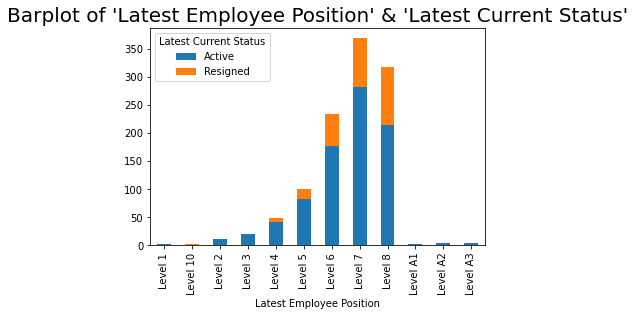

In [127]:
cross_tab.plot.bar(stacked=True)
plt.title("Barplot of 'Latest Employee Position' & 'Latest Current Status'", fontsize=20)
plt.show()

In [128]:
stat, p, dof, expected = chi2_contingency(cross_tab)

In [129]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent')
else:
    print('Independent')

p value is 0.004354638439757437
Dependent


#### Profit Center :

In [130]:
# cross_tab_per = pd.crosstab(data["Latest Profit Center"],data["Latest Current Status"],  normalize='index').round(4)*100
# cross_tab_per

In [131]:
cross_tab = pd.crosstab(data["Latest Profit Center"],data["Latest Current Status"])
# cross_tab

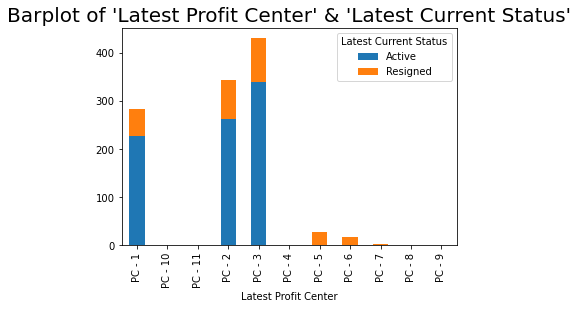

In [132]:
cross_tab.plot.bar(stacked=True)
plt.title("Barplot of 'Latest Profit Center' & 'Latest Current Status'", fontsize=20)
plt.show()

In [133]:
stat, p, dof, expected = chi2_contingency(cross_tab)

In [134]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent')
else:
    print('Independent')

p value is 1.7734522274869409e-28
Dependent


#### Employee Location :

In [135]:
# cross_tab_per = pd.crosstab(data["Latest Employee Location"],data["Latest Current Status"],  normalize='index').round(4)*100
# cross_tab_per

In [136]:
cross_tab = pd.crosstab(data["Latest Employee Location"],data["Latest Current Status"])
# cross_tab

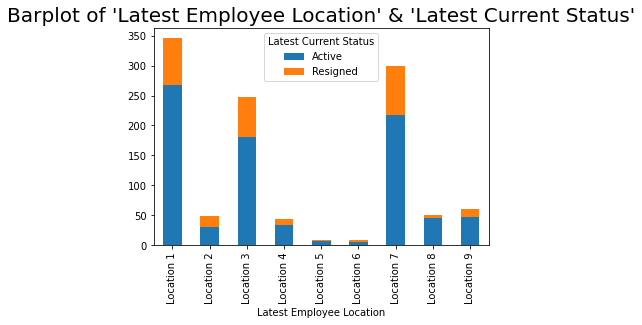

In [137]:
cross_tab.plot.bar(stacked=True)
plt.title("Barplot of 'Latest Employee Location' & 'Latest Current Status'", fontsize=20)
plt.show()

In [138]:
stat, p, dof, expected = chi2_contingency(cross_tab)

In [139]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent')
else:
    print('Independent')

p value is 0.17465165527812224
Independent


#### People Group :

In [140]:
# data["Latest People Group"].value_counts()

In [141]:
# cross_tab_per = pd.crosstab(data["Latest People Group"],data["Latest Current Status"],  normalize='index').round(4)*100
# cross_tab_per

In [142]:
# x,y = 'Latest People Group', 'Latest Current Status'
# df1 = data.groupby(x)[y].value_counts(normalize=True)
# df1 = df1.mul(100)
# df1 = df1.rename('Percent Value').reset_index()
# g = sns.catplot(x=x,y='Percent Value',hue=y,kind='bar',data=df1)
# g.ax.set_ylim(0,100)
# for p in g.ax.patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() 
#     txt_y = p.get_height()
#     g.ax.text(txt_x,txt_y,txt)

In [143]:
cross_tab = pd.crosstab(data["Latest People Group"],data["Latest Current Status"])
# cross_tab

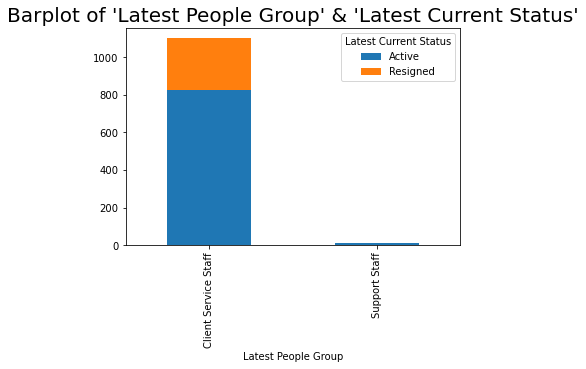

In [144]:
cross_tab.plot.bar(stacked=True)
plt.title("Barplot of 'Latest People Group' & 'Latest Current Status'", fontsize=20)
plt.show()

In [145]:
stat, p, dof, expected = chi2_contingency(cross_tab)

In [146]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent')
else:
    print('Independent')

p value is 0.4658114104893739
Independent


#### Employee Category :

In [147]:
# data["Latest Employee Category"].value_counts()

In [148]:
# cross_tab_per = pd.crosstab(data["Latest Employee Category"],data["Latest Current Status"],  normalize='index').round(4)*100
# cross_tab_per

In [149]:
cross_tab = pd.crosstab(data["Latest Employee Category"],data["Latest Current Status"])
# cross_tab

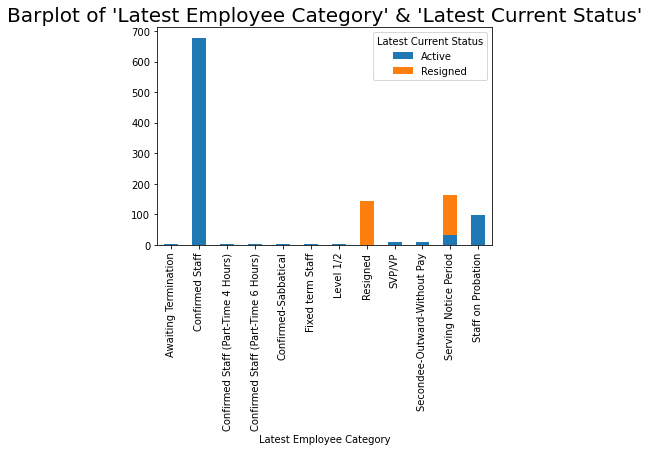

In [150]:
cross_tab.plot.bar(stacked=True)
plt.title("Barplot of 'Latest Employee Category' & 'Latest Current Status'", fontsize=20)
plt.show()

In [151]:
stat, p, dof, expected = chi2_contingency(cross_tab)

In [152]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent')
else:
    print('Independent')

p value is 6.683784794445177e-200
Dependent


#### Supervisor name :

In [153]:
cross_tab = pd.crosstab(data["Latest Supervisor name"],data["Latest Current Status"])

In [154]:
stat, p, dof, expected = chi2_contingency(cross_tab)

In [155]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent')
else:
    print('Independent')

p value is 6.8434893905978525e-09
Dependent


#### Join Date & Termination Date : (Tenure)

In [156]:
# Function for Outlier Treatment :
def treat_outlier(col) :
    qunt10,qunt1, qunt3, qunt90 = np.percentile(col, [10,25,75,90])
    iqr = qunt3 - qunt1
    lower_val = qunt1-(1.5*iqr)
    upper_val = qunt1+(1.5*iqr)
    for i, name in enumerate(col) :
        if(col[i]<lower_val) :
            col[i]=qunt10
        elif(col[i]>upper_val) :
            col[i]=qunt90
        else :
            col[i]=col[i]

In [157]:
# plt.figure(figsize=(8,8))
# sns.boxplot(data["Tenure"])
# plt.title("Boxplot of 'Tenure'", fontsize=20)
# plt.show()

In [158]:
# # Outlier Treatment :
# treat_outlier(data["Tenure"])

In [159]:
model = ols('data["Tenure"] ~ data["Latest Current Status"]', data=data).fit()
anova_result = sm.stats.anova_lm(model, type=2)
p = anova_result["PR(>F)"][0]
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent')
else:
    print('Independent')

p value is 0.010742119823202879
Dependent


In [160]:
statistic, pvalue = stats.ttest_ind(data["Tenure"][data["Latest Current Status"] == "Active"],
                data["Tenure"][data["Latest Current Status"] == "Resigned"])
pvalue
alpha = 0.05
print("p value is " + str(p))
if pvalue <= alpha:
    print('There is a statistically significant difference in the Means.')
else:
    print('Same Means')

p value is 0.010742119823202879
There is a statistically significant difference in the Means.


<Figure size 1440x1440 with 0 Axes>

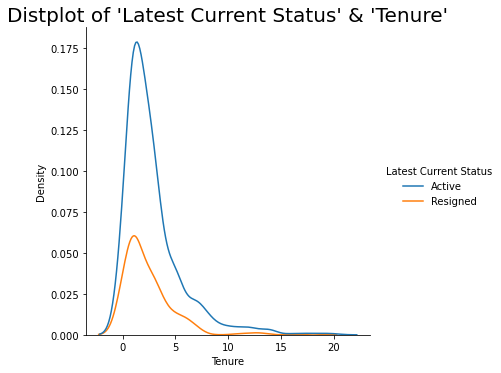

In [161]:
plt.figure(figsize=(20,20))
# sns.displot(data=data, x="Tenure", hue="Latest Current Status",kde=True)
sns.displot(data=data, x="Tenure", hue="Latest Current Status", kind="kde")
plt.title("Distplot of 'Latest Current Status' & 'Tenure'", fontsize=20)
plt.show()

In [162]:
df_mean_std = data.groupby("Latest Current Status").agg([np.mean, np.std])
mean_std = df_mean_std['Tenure']
mean_std.head()

,mean,std
Latest Current Status,,
Active,2.803357,2.783882
Resigned,2.328520,2.336776


#### Overall Total Hours :

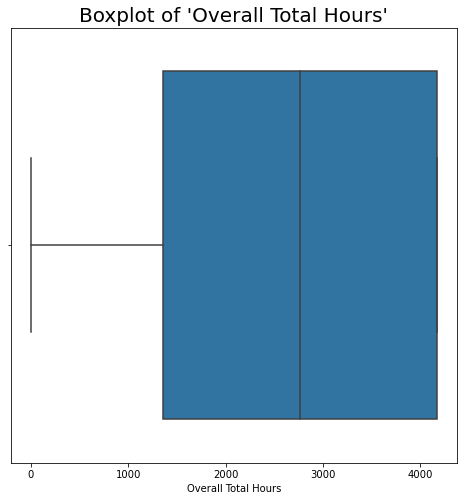

In [163]:
plt.figure(figsize=(8,8))
sns.boxplot(data["Overall Total Hours"])
plt.title("Boxplot of 'Overall Total Hours'", fontsize=20)
plt.show()

In [164]:
model = ols('data["Overall Total Hours"] ~ data["Latest Current Status"]', data=data).fit()
anova_result = sm.stats.anova_lm(model, type=2)
p = anova_result["PR(>F)"][0]
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent')
else:
    print('Independent')

p value is 7.108462869598343e-32
Dependent


In [165]:
statistic, pvalue = stats.ttest_ind(data["Overall Total Hours"][data["Latest Current Status"] == "Active"],
                data["Overall Total Hours"][data["Latest Current Status"] == "Resigned"])
pvalue
alpha = 0.05
print("p value is " + str(p))
if pvalue <= alpha:
    print('There is a statistically significant difference in the Means.')
else:
    print('Same Means')

p value is 7.108462869598343e-32
There is a statistically significant difference in the Means.


<Figure size 1440x1440 with 0 Axes>

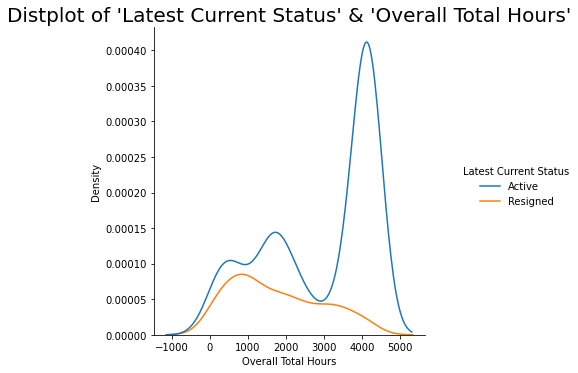

In [166]:
plt.figure(figsize=(20,20))
# sns.displot(data=data, x="Overall Total Hours", hue="Latest Current Status",kde=True)
sns.displot(data=data, x="Overall Total Hours", hue="Latest Current Status", kind="kde")
plt.title("Distplot of 'Latest Current Status' & 'Overall Total Hours'", fontsize=20)
plt.show()

In [167]:
df_mean_std = data.groupby("Latest Current Status").agg([np.mean, np.std])
mean_std = df_mean_std['Overall Total Hours']
mean_std.head()

,mean,std
Latest Current Status,,
Active,2907.645084,1446.175075
Resigned,1742.758123,1181.671067


#### Overall Total Available Hours :

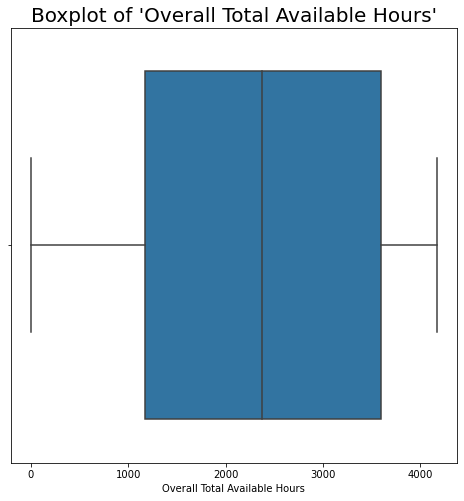

In [168]:
plt.figure(figsize=(8,8))
sns.boxplot(data["Overall Total Available Hours"])
plt.title("Boxplot of 'Overall Total Available Hours'", fontsize=20)
plt.show()

In [169]:
model = ols('data["Overall Total Available Hours"] ~ data["Latest Current Status"]', data=data).fit()
anova_result = sm.stats.anova_lm(model, type=2)
p = anova_result["PR(>F)"][0]
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent')
else:
    print('Independent')

p value is 3.8072902343845204e-30
Dependent


In [170]:
statistic, pvalue = stats.ttest_ind(data["Overall Total Available Hours"][data["Latest Current Status"] == "Active"],
                data["Overall Total Available Hours"][data["Latest Current Status"] == "Resigned"])
pvalue
alpha = 0.05
print("p value is " + str(p))
if pvalue <= alpha:
    print('There is a statistically significant difference in the Means.')
else:
    print('Same Means')

p value is 3.8072902343845204e-30
There is a statistically significant difference in the Means.


<Figure size 1440x1440 with 0 Axes>

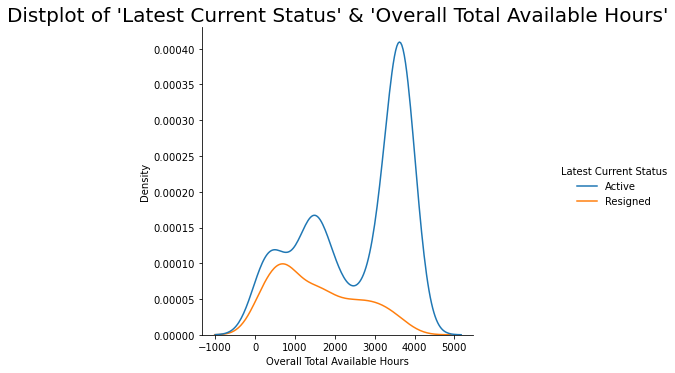

In [171]:
plt.figure(figsize=(20,20))
# sns.displot(data=data, x="Overall Total Available Hours", hue="Latest Current Status",kde=True)
sns.displot(data=data, x="Overall Total Available Hours", hue="Latest Current Status", kind="kde")
plt.title("Distplot of 'Latest Current Status' & 'Overall Total Available Hours'", fontsize=20)
plt.show()

In [172]:
df_mean_std = data.groupby("Latest Current Status").agg([np.mean, np.std])
mean_std = df_mean_std['Overall Total Available Hours']
mean_std.head()

,mean,std
Latest Current Status,,
Active,2528.194245,1281.186421
Resigned,1527.288809,1050.971702


#### Overall Total Work Hours :

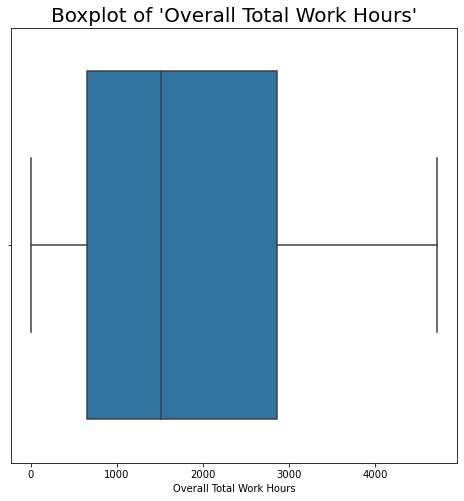

In [173]:
plt.figure(figsize=(8,8))
sns.boxplot(data["Overall Total Work Hours"])
plt.title("Boxplot of 'Overall Total Work Hours'", fontsize=20)
plt.show()

In [174]:
model = ols('data["Overall Total Work Hours"] ~ data["Latest Current Status"]', data=data).fit()
anova_result = sm.stats.anova_lm(model, type=2)
p = anova_result["PR(>F)"][0]
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent')
else:
    print('Independent')

p value is 1.555326279277409e-23
Dependent


In [175]:
statistic, pvalue = stats.ttest_ind(data["Overall Total Work Hours"][data["Latest Current Status"] == "Active"],
                data["Overall Total Work Hours"][data["Latest Current Status"] == "Resigned"])
pvalue
alpha = 0.05
print("p value is " + str(p))
if pvalue <= alpha:
    print('There is a statistically significant difference in the Means.')
else:
    print('Same Means')

p value is 1.555326279277409e-23
There is a statistically significant difference in the Means.


<Figure size 1440x1440 with 0 Axes>

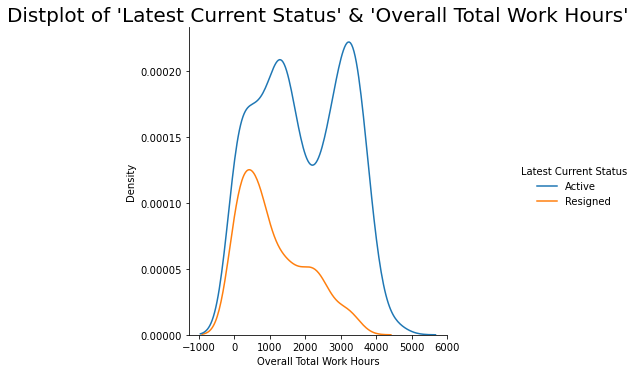

In [176]:
plt.figure(figsize=(20,20))
# sns.displot(data=data, x="Overall Total Work Hours", hue="Latest Current Status",kde=True)
sns.displot(data=data, x="Overall Total Work Hours", hue="Latest Current Status", kind="kde")
plt.title("Distplot of 'Latest Current Status' & 'Overall Total Work Hours'", fontsize=20)
plt.show()

In [177]:
df_mean_std = data.groupby("Latest Current Status").agg([np.mean, np.std])
mean_std = df_mean_std['Overall Total Work Hours']
mean_std.head()

,mean,std
Latest Current Status,,
Active,1925.742206,1224.661178
Resigned,1103.411552,933.956275


#### Overall Total Leave Hours :

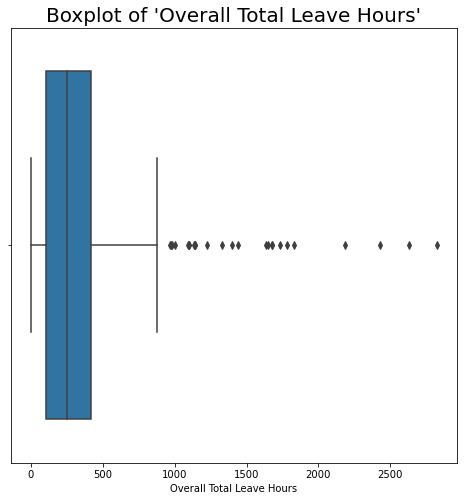

In [178]:
plt.figure(figsize=(8,8))
sns.boxplot(data["Overall Total Leave Hours"])
plt.title("Boxplot of 'Overall Total Leave Hours'", fontsize=20)
plt.show()

In [179]:
# Outlier Treatment :
treat_outlier(data["Overall Total Leave Hours"])

In [180]:
model = ols('data["Overall Total Leave Hours"] ~ data["Latest Current Status"]', data=data).fit()
anova_result = sm.stats.anova_lm(model, type=2)
p = anova_result["PR(>F)"][0]
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent')
else:
    print('Independent')

p value is 4.123632533904085e-23
Dependent


In [181]:
statistic, pvalue = stats.ttest_ind(data["Overall Total Leave Hours"][data["Latest Current Status"] == "Active"],
                data["Overall Total Leave Hours"][data["Latest Current Status"] == "Resigned"])
pvalue
alpha = 0.05
print("p value is " + str(p))
if pvalue <= alpha:
    print('There is a statistically significant difference in the Means.')
else:
    print('Same Means')

p value is 4.123632533904085e-23
There is a statistically significant difference in the Means.


<Figure size 1440x1440 with 0 Axes>

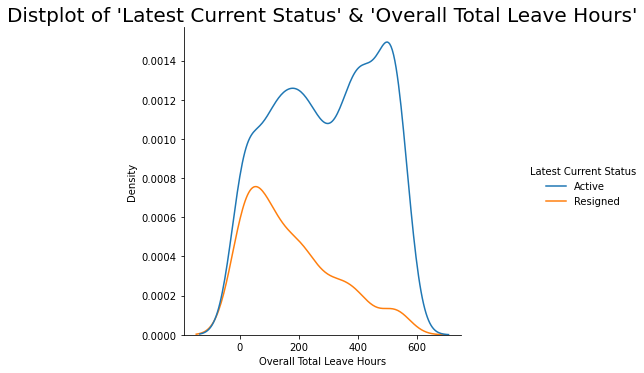

In [182]:
plt.figure(figsize=(20,20))
# sns.displot(data=data, x="Overall Total Leave Hours", hue="Latest Current Status",kde=True)
sns.displot(data=data, x="Overall Total Leave Hours", hue="Latest Current Status", kind="kde")
plt.title("Distplot of 'Latest Current Status' & 'Overall Total Leave Hours'", fontsize=20)
plt.show()

In [183]:
df_mean_std = data.groupby("Latest Current Status").agg([np.mean, np.std])
mean_std = df_mean_std['Overall Total Leave Hours']
mean_std.head()

,mean,std
Latest Current Status,,
Active,292.410072,173.706413
Resigned,174.061372,151.851209


#### Overall Total Training Hours :

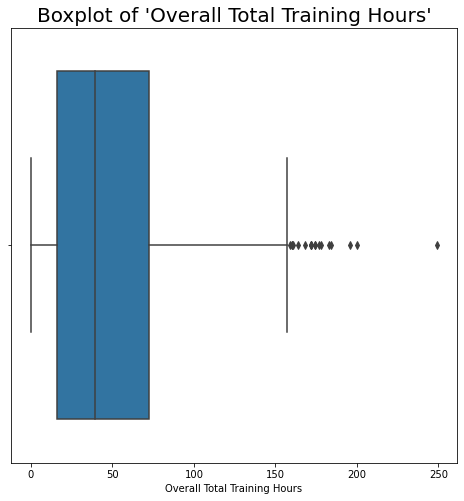

In [184]:
plt.figure(figsize=(8,8))
sns.boxplot(data["Overall Total Training Hours"])
plt.title("Boxplot of 'Overall Total Training Hours'", fontsize=20)
plt.show()

In [185]:
# Outlier Treatment :
treat_outlier(data["Overall Total Training Hours"])

In [186]:
model = ols('data["Overall Total Training Hours"] ~ data["Latest Current Status"]', data=data).fit()
anova_result = sm.stats.anova_lm(model, type=2)
p = anova_result["PR(>F)"][0]
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent')
else:
    print('Independent')

p value is 3.0510407816314804e-25
Dependent


In [187]:
statistic, pvalue = stats.ttest_ind(data["Overall Total Training Hours"][data["Latest Current Status"] == "Active"],
                data["Overall Total Training Hours"][data["Latest Current Status"] == "Resigned"])
pvalue
alpha = 0.05
print("p value is " + str(p))
if pvalue <= alpha:
    print('There is a statistically significant difference in the Means.')
else:
    print('Same Means')

p value is 3.0510407816314804e-25
There is a statistically significant difference in the Means.


<Figure size 1440x1440 with 0 Axes>

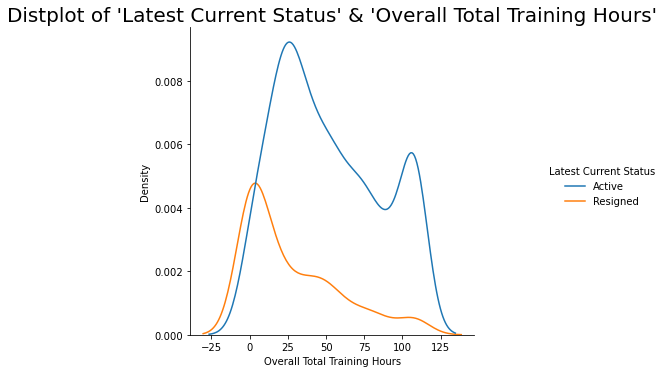

In [188]:
plt.figure(figsize=(20,20))
# sns.displot(data=data, x="Overall Total Training Hours", hue="Latest Current Status",kde=True)
sns.displot(data=data, x="Overall Total Training Hours", hue="Latest Current Status", kind="kde")
plt.title("Distplot of 'Latest Current Status' & 'Overall Total Training Hours'", fontsize=20)
plt.show()

In [189]:
df_mean_std = data.groupby("Latest Current Status").agg([np.mean, np.std])
mean_std = df_mean_std['Overall Total Training Hours']
mean_std.head()

,mean,std
Latest Current Status,,
Active,51.950839,33.980910
Resigned,27.361011,31.264991


#### Overall Total BD Hours :

In [190]:
model = ols('data["Overall Total BD Hours"] ~ data["Latest Current Status"]', data=data).fit()
anova_result = sm.stats.anova_lm(model, type=2)
p = anova_result["PR(>F)"][0]
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent')
else:
    print('Independent')

p value is 0.009112315839782118
Dependent


In [191]:
statistic, pvalue = stats.ttest_ind(data["Overall Total BD Hours"][data["Latest Current Status"] == "Active"],
                data["Overall Total BD Hours"][data["Latest Current Status"] == "Resigned"])
pvalue
alpha = 0.05
print("p value is " + str(p))
if pvalue <= alpha:
    print('There is a statistically significant difference in the Means.')
else:
    print('Same Means')

p value is 0.009112315839782118
There is a statistically significant difference in the Means.


<Figure size 1440x1440 with 0 Axes>

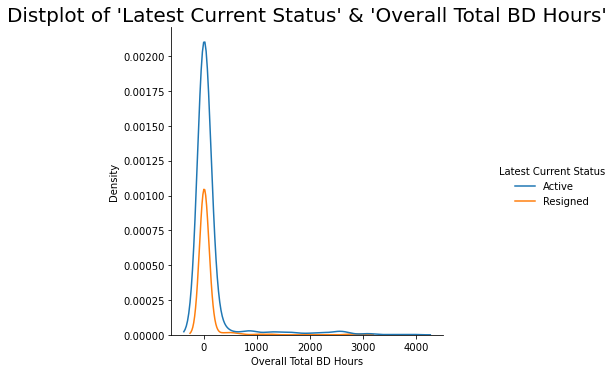

In [192]:
plt.figure(figsize=(20,20))
# sns.displot(data=data, x="Overall Total BD Hours", hue="Latest Current Status",kde=True)
sns.displot(data=data, x="Overall Total BD Hours", hue="Latest Current Status", kind="kde")
plt.title("Distplot of 'Latest Current Status' & 'Overall Total BD Hours'", fontsize=20)
plt.show()

In [193]:
df_mean_std = data.groupby("Latest Current Status").agg([np.mean, np.std])
mean_std = df_mean_std['Overall Total BD Hours']
mean_std.head()

,mean,std
Latest Current Status,,
Active,130.255396,487.044465
Resigned,49.967509,270.630361


#### Overall Total NC Hours :

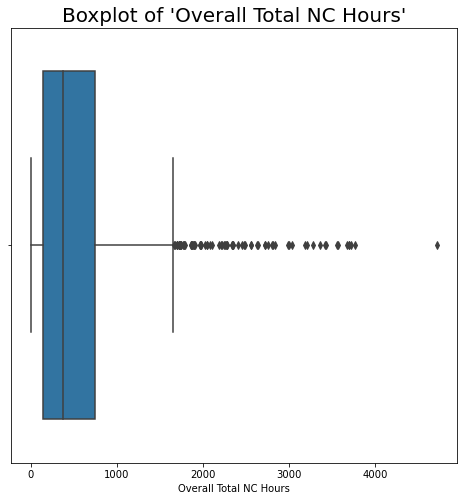

In [194]:
plt.figure(figsize=(8,8))
sns.boxplot(data["Overall Total NC Hours"])
plt.title("Boxplot of 'Overall Total NC Hours'", fontsize=20)
plt.show()

In [195]:
# Outlier Treatment :
treat_outlier(data["Overall Total NC Hours"])

In [196]:
model = ols('data["Overall Total NC Hours"] ~ data["Latest Current Status"]', data=data).fit()
anova_result = sm.stats.anova_lm(model, type=2)
p = anova_result["PR(>F)"][0]
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent')
else:
    print('Independent')

p value is 0.001310293579645645
Dependent


In [197]:
statistic, pvalue = stats.ttest_ind(data["Overall Total NC Hours"][data["Latest Current Status"] == "Active"],
                data["Overall Total NC Hours"][data["Latest Current Status"] == "Resigned"])
pvalue
alpha = 0.05
print("p value is " + str(p))
if pvalue <= alpha:
    print('There is a statistically significant difference in the Means.')
else:
    print('Same Means')

p value is 0.001310293579645645
There is a statistically significant difference in the Means.


<Figure size 1440x1440 with 0 Axes>

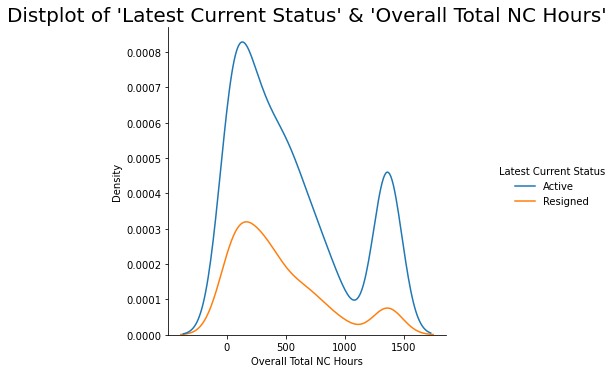

In [198]:
plt.figure(figsize=(20,20))
# sns.displot(data=data, x="Overall Total NC Hours", hue="Latest Current Status",kde=True)
sns.displot(data=data, x="Overall Total NC Hours", hue="Latest Current Status", kind="kde")
plt.title("Distplot of 'Latest Current Status' & 'Overall Total NC Hours'", fontsize=20)
plt.show()

In [199]:
df_mean_std = data.groupby("Latest Current Status").agg([np.mean, np.std])
mean_std = df_mean_std['Overall Total NC Hours']
mean_std.head()

,mean,std
Latest Current Status,,
Active,537.595923,467.720080
Resigned,436.812274,396.575359


#### Overall Total Utilization% :

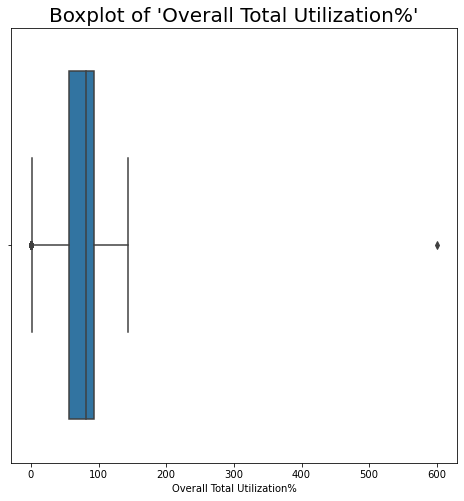

In [200]:
plt.figure(figsize=(8,8))
sns.boxplot(data["Overall Total Utilization%"])
plt.title("Boxplot of 'Overall Total Utilization%'", fontsize=20)
plt.show()

In [201]:
# Outlier Treatment :
treat_outlier(data["Overall Total Utilization%"])

In [202]:
model = ols('data["Overall Total Utilization%"] ~ data["Latest Current Status"]', data=data).fit()
anova_result = sm.stats.anova_lm(model, type=2)
p = anova_result["PR(>F)"][0]
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent')
else:
    print('Independent')

p value is 3.216458478076734e-05
Dependent


In [203]:
statistic, pvalue = stats.ttest_ind(data["Overall Total Utilization%"][data["Latest Current Status"] == "Active"],
                data["Overall Total Utilization%"][data["Latest Current Status"] == "Resigned"])
pvalue
alpha = 0.05
print("p value is " + str(p))
if pvalue <= alpha:
    print('There is a statistically significant difference in the Means.')
else:
    print('Same Means')

p value is 3.216458478076734e-05
There is a statistically significant difference in the Means.


<Figure size 1440x1440 with 0 Axes>

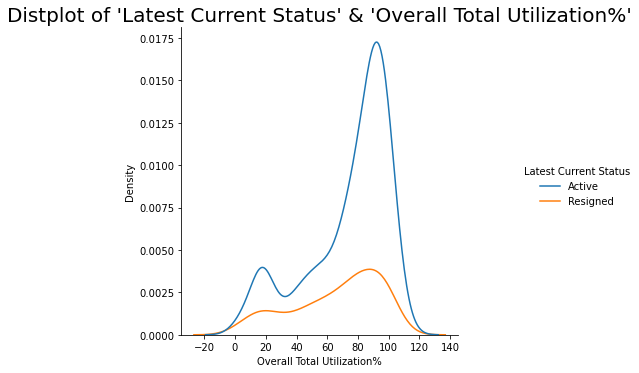

In [204]:
plt.figure(figsize=(20,20))
# sns.displot(data=data, x="Overall Total Utilization%", hue="Latest Current Status",kde=True)
sns.displot(data=data, x="Overall Total Utilization%", hue="Latest Current Status", kind="kde")
plt.title("Distplot of 'Latest Current Status' & 'Overall Total Utilization%'", fontsize=20)
plt.show()

In [205]:
df_mean_std = data.groupby("Latest Current Status").agg([np.mean, np.std])
mean_std = df_mean_std['Overall Total Utilization%']
mean_std.head()

,mean,std
Latest Current Status,,
Active,74.091127,27.122661
Resigned,66.133574,28.554807


### Removing Independent/Insignificant variables :

In [206]:
# data.shape
print(f"Dataset has {data.shape[0]} rows and {data.shape[1]} coumns.")

Dataset has 1111 rows and 17 coumns.


In [207]:
data = data[['Employee No',
             'Latest Current Status',
             'Latest Employee Position',
             'Latest Profit Center',
#              'Latest Employee Location',
#              'Latest People Group',
             'Latest Employee Category',
             'Latest Supervisor name',
             'Overall Total Hours',
             'Overall Total Available Hours',
             'Overall Total Work Hours',
             'Overall Total Leave Hours',
             'Overall Total Training Hours',
             'Overall Total BD Hours',
             'Overall Total NC Hours',
             'Overall Total Utilization%',
             'Tenure']]
data.head()

,Employee No,Latest Current Status,Latest Employee Position,Latest Profit Center,Latest Employee Category,Latest Supervisor name,Overall Total Hours,Overall Total Available Hours,Overall Total Work Hours,Overall Total Leave Hours,Overall Total Training Hours,Overall Total BD Hours,Overall Total NC Hours,Overall Total Utilization%,Tenure
0,1,Active,Level 1,PC - 1,SVP/VP,Idalina Lauraine,4168,3666,1084,404,97,2623,74,29,18
1,2,Active,Level 2,PC - 2,SVP/VP,Idalina Lauraine,4168,3750,1277,364,54,1294,1363,34,19
2,3,Active,Level 2,PC - 2,SVP/VP,Idalina Lauraine,4168,3618,2177,482,67,970,907,60,17
3,4,Resigned,Level 2,PC - 3,Resigned,Idalina Lauraine,3928,3491,546,404,32,2743,279,15,18
4,5,Active,Level 1,PC - 4,Level 1/2,Abagail Druci,1312,1205,149,104,3,1159,818,12,20


In [208]:
# data.shape
print(f"Dataset has {data.shape[0]} rows and {data.shape[1]} coumns.")

Dataset has 1111 rows and 15 coumns.


# STEP 05 : Missing Values Treatment :

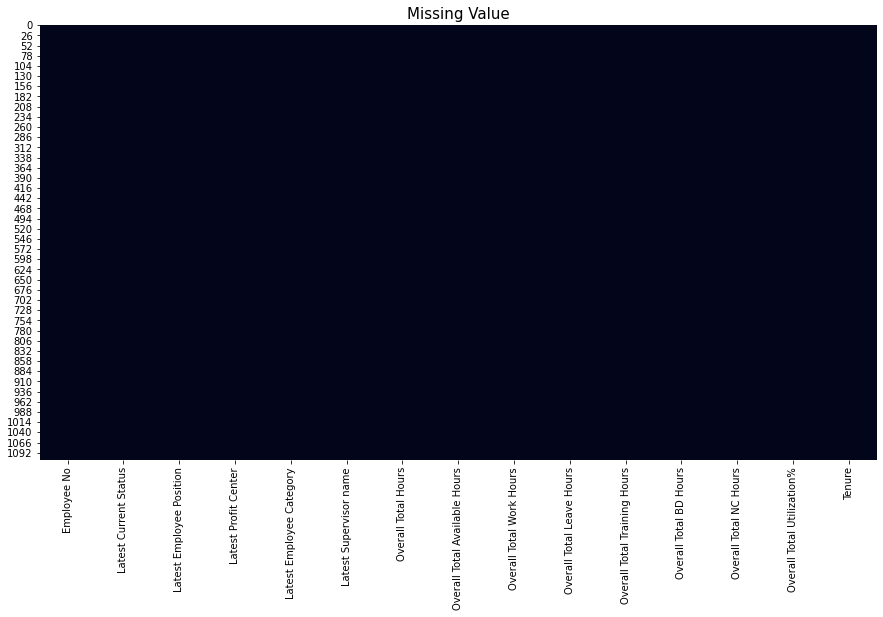

In [209]:
plt.figure(figsize=(15,8))
sns.heatmap(data.isnull(),cbar= False)
plt.title("Missing Value", fontsize =15)
plt.show()

In [210]:
# Missing Values :
print(f"Dataset has {data.isnull().sum().sum()} missing values.")

Dataset has 0 missing values.


# STEP 06 : Multicolinearity :

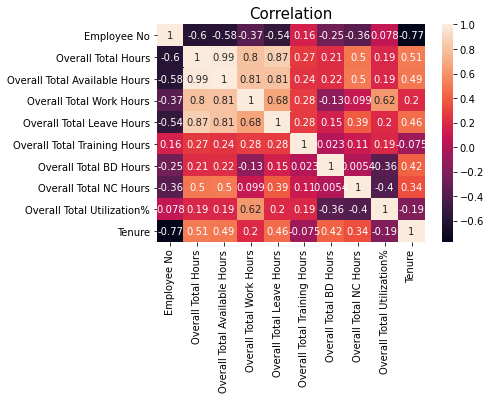

In [211]:
# Finding Multi=colinearity between numerical variables.
num_data = data.select_dtypes(include=np.number)
num_data.columns
a = num_data.corr()
sns.heatmap(a, annot = True)
plt.title("Correlation", fontsize =15)
plt.show()

In [212]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [213]:
calc_vif(num_data)

,variables,VIF
0,Employee No,6.912237
1,Overall Total Hours,417.233120
2,Overall Total Available Hours,342.022084
3,Overall Total Work Hours,46.072299
4,Overall Total Leave Hours,22.441734
5,Overall Total Training Hours,3.695042
6,Overall Total BD Hours,3.056159
7,Overall Total NC Hours,9.135932
8,Overall Total Utilization%,17.477728
9,Tenure,4.531213


In [214]:
# "Overall Total Hours" & "Overall Total Available Hours" variables have multi-colinearity with other variables.
# Hence, we remove such variables.

In [215]:
data.drop("Overall Total Hours", axis=1, inplace=True)

In [216]:
data.drop("Overall Total Available Hours", axis=1, inplace=True)

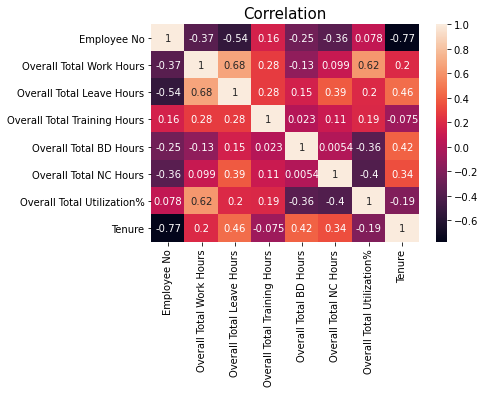

In [217]:
num_data = data.select_dtypes(include=np.number)
num_data.columns
a = num_data.corr()
sns.heatmap(a, annot = True)
plt.title("Correlation", fontsize =15)
plt.show()

In [218]:
calc_vif(num_data)

,variables,VIF
0,Employee No,6.757754
1,Overall Total Work Hours,11.447877
2,Overall Total Leave Hours,9.311575
3,Overall Total Training Hours,3.569702
4,Overall Total BD Hours,1.634921
5,Overall Total NC Hours,3.498883
6,Overall Total Utilization%,17.147019
7,Tenure,4.209392


In [219]:
data.drop("Overall Total Utilization%", axis=1, inplace=True)

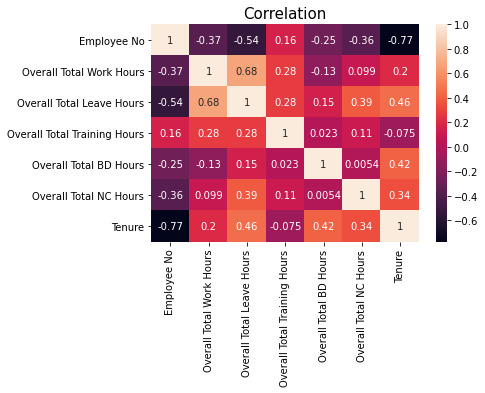

In [220]:
num_data = data.select_dtypes(include=np.number)
num_data.columns
a = num_data.corr()
sns.heatmap(a, annot = True)
plt.title("Correlation", fontsize =15)
plt.show()

In [221]:
calc_vif(num_data)

,variables,VIF
0,Employee No,2.355529
1,Overall Total Work Hours,6.561163
2,Overall Total Leave Hours,9.286317
3,Overall Total Training Hours,3.569288
4,Overall Total BD Hours,1.503863
5,Overall Total NC Hours,3.002686
6,Tenure,3.396853


In [222]:
# Make a copy of the original sourcefile
df_HR = data.copy()

# STEP 07 : Min-Max Scaling :

In [223]:
# Numerical Data
numerical_data = data.select_dtypes(include=np.number)
numerical_data = numerical_data.drop("Employee No", axis=1)
numerical_data.columns

Index(['Overall Total Work Hours', 'Overall Total Leave Hours',
       'Overall Total Training Hours', 'Overall Total BD Hours',
       'Overall Total NC Hours', 'Tenure'],
      dtype='object')

In [224]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)
numerical_data_scaled = pd.DataFrame(numerical_data_scaled, columns=numerical_data.columns)
numerical_data_scaled.head()

,Overall Total Work Hours,Overall Total Leave Hours,Overall Total Training Hours,Overall Total BD Hours,Overall Total NC Hours,Tenure
0,0.229856,0.707531,0.898148,0.674120,0.054292,0.90
1,0.270780,0.637478,0.500000,0.332562,1.000000,0.95
2,0.461620,0.844133,0.620370,0.249293,0.665444,0.85
3,0.115776,0.707531,0.296296,0.704960,0.204696,0.90
4,0.031595,0.182137,0.027778,0.297867,0.600147,1.00


In [225]:
for col in numerical_data.columns :
    del data[col]

In [226]:
data = pd.concat([data, numerical_data_scaled], axis=1, join='inner')
data.head()

,Employee No,Latest Current Status,Latest Employee Position,Latest Profit Center,Latest Employee Category,Latest Supervisor name,Overall Total Work Hours,Overall Total Leave Hours,Overall Total Training Hours,Overall Total BD Hours,Overall Total NC Hours,Tenure
0,1,Active,Level 1,PC - 1,SVP/VP,Idalina Lauraine,0.229856,0.707531,0.898148,0.674120,0.054292,0.90
1,2,Active,Level 2,PC - 2,SVP/VP,Idalina Lauraine,0.270780,0.637478,0.500000,0.332562,1.000000,0.95
2,3,Active,Level 2,PC - 2,SVP/VP,Idalina Lauraine,0.461620,0.844133,0.620370,0.249293,0.665444,0.85
3,4,Resigned,Level 2,PC - 3,Resigned,Idalina Lauraine,0.115776,0.707531,0.296296,0.704960,0.204696,0.90
4,5,Active,Level 1,PC - 4,Level 1/2,Abagail Druci,0.031595,0.182137,0.027778,0.297867,0.600147,1.00


In [227]:
data.dtypes

Employee No                       int64
Latest Current Status            object
Latest Employee Position         object
Latest Profit Center             object
Latest Employee Category         object
Latest Supervisor name           object
Overall Total Work Hours        float64
Overall Total Leave Hours       float64
Overall Total Training Hours    float64
Overall Total BD Hours          float64
Overall Total NC Hours          float64
Tenure                          float64
dtype: object

In [228]:
data_new = data.copy()

# STEP 08 : Encoding :

In [229]:
# Categorical Data
categorical_data = data.select_dtypes(include=np.object)
categorical_data = categorical_data.drop("Latest Current Status", axis=1)
categorical_data.columns

Index(['Latest Employee Position', 'Latest Profit Center',
       'Latest Employee Category', 'Latest Supervisor name'],
      dtype='object')

In [230]:
categorical_data_encoded =pd.get_dummies(data=categorical_data,drop_first=True)
categorical_data_encoded.head()

,Latest Employee Position_Level 10,Latest Employee Position_Level 2,Latest Employee Position_Level 3,Latest Employee Position_Level 4,Latest Employee Position_Level 5,Latest Employee Position_Level 6,Latest Employee Position_Level 7,Latest Employee Position_Level 8,Latest Employee Position_Level A1,Latest Employee Position_Level A2,Latest Employee Position_Level A3,Latest Profit Center_PC - 10,Latest Profit Center_PC - 11,Latest Profit Center_PC - 2,Latest Profit Center_PC - 3,Latest Profit Center_PC - 4,Latest Profit Center_PC - 5,Latest Profit Center_PC - 6,Latest Profit Center_PC - 7,Latest Profit Center_PC - 8,Latest Profit Center_PC - 9,Latest Employee Category_Confirmed Staff,Latest Employee Category_Confirmed Staff (Part-Time 4 Hours),Latest Employee Category_Confirmed Staff (Part-Time 6 Hours),Latest Employee Category_Confirmed-Sabbatical,Latest Employee Category_Fixed term Staff,Latest Employee Category_Level 1/2,Latest Employee Category_Resigned,Latest Employee Category_SVP/VP,Latest Employee Category_Secondee-Outward-Without Pay,Latest Employee Category_Serving Notice Period,Latest Employee Category_Staff on Probation,Latest Supervisor name_Aeriela Elonore,Latest Supervisor name_Agata Theodosia,Latest Supervisor name_Agnes Stacie,Latest Supervisor name_Ailyn Marie-Ann,Latest Supervisor name_Aimil Latisha,Latest Supervisor name_Ali Elsinore,Latest Supervisor name_Alvinia Ede,Latest Supervisor name_Annnora Gabrielle,Latest Supervisor name_Ardys Katerine,Latest Supervisor name_Audi Stephana,Latest Supervisor name_Barbee Joey,Latest Supervisor name_Benedikta Kirbee,Latest Supervisor name_Bernice Andrea,Latest Supervisor name_Beryle Lisha,Latest Supervisor name_Beverley Laney,Latest Supervisor name_Blair Dinny,Latest Supervisor name_Blondy Tatiania,Latest Supervisor name_Cacilia Aimee,Latest Supervisor name_Cassandra Katerina,Latest Supervisor name_Cherise Lainey,Latest Supervisor name_Cherry Fancie,Latest Supervisor name_Chris Ricky,Latest Supervisor name_Christina Desdemona,Latest Supervisor name_Claudia Meaghan,Latest Supervisor name_Cody Ashlan,Latest Supervisor name_Conni Athene,Latest Supervisor name_Cordey Sofia,Latest Supervisor name_Cordula Devan,Latest Supervisor name_Cortney Wanids,Latest Supervisor name_Cosette Lavena,Latest Supervisor name_Cynthia Leonora,Latest Supervisor name_Danette Melinda,Latest Supervisor name_Dannie Clotilda,Latest Supervisor name_Daryl Natalina,Latest Supervisor name_Deloris Gabriella,Latest Supervisor name_Dionne Ronna,Latest Supervisor name_Donette Verne,Latest Supervisor name_Dore Natalya,Latest Supervisor name_Dorotea Inger,Latest Supervisor name_Dottie Bidget,Latest Supervisor name_Douglas Herrera,Latest Supervisor name_Em Cacilie,Latest Supervisor name_Emelda Jackqueline,Latest Supervisor name_Erminie Ericka,Latest Supervisor name_Eydie Francine,Latest Supervisor name_Ezmeralda Nisse,Latest Supervisor name_Frances Mignonne,Latest Supervisor name_Gavra Kayle,Latest Supervisor name_Genvieve Celeste,Latest Supervisor name_Gert Editha,Latest Supervisor name_Gisella Nickie,Latest Supervisor name_Grata Rochella,Latest Supervisor name_Guenevere Florida,Latest Supervisor name_Hedi Elna,Latest Supervisor name_Hedwiga Mehetabel,Latest Supervisor name_Idalina Lauraine,Latest Supervisor name_Ilsa Marigold,Latest Supervisor name_Imelda Madalena,Latest Supervisor name_Iormina Lucienne,Latest Supervisor name_Irene Candis,Latest Supervisor name_Isahella Gwendolin,Latest Supervisor name_Jamiya Sellers,Latest Supervisor name_Jaylin Berg,Latest Supervisor name_Jillana Vivi,Latest Supervisor name_Jillian Lorelei,Latest Supervisor name_Johan Gaines,Latest Supervisor name_Jolyn Briney,Latest Supervisor name_Jordanna Danya,Latest Supervisor name_Josey Rorie,Latest Supervisor name_Josi Ula,Latest Supervisor name_Kali Gwendolyn,Latest Supervisor name_Kalie Sylvia,Latest Supervisor name_Kalindi Toma,Latest Supervisor name_Kathye Edna,Latest Supervisor name_Kati Rosalyn,Latest Supervisor name_Katuscha Pr

In [231]:
for col in categorical_data.columns :
    del data[col]

In [232]:
data = pd.concat([data, categorical_data_encoded], axis=1, join='inner')
data.head()

,Employee No,Latest Current Status,Overall Total Work Hours,Overall Total Leave Hours,Overall Total Training Hours,Overall Total BD Hours,Overall Total NC Hours,Tenure,Latest Employee Position_Level 10,Latest Employee Position_Level 2,Latest Employee Position_Level 3,Latest Employee Position_Level 4,Latest Employee Position_Level 5,Latest Employee Position_Level 6,Latest Employee Position_Level 7,Latest Employee Position_Level 8,Latest Employee Position_Level A1,Latest Employee Position_Level A2,Latest Employee Position_Level A3,Latest Profit Center_PC - 10,Latest Profit Center_PC - 11,Latest Profit Center_PC - 2,Latest Profit Center_PC - 3,Latest Profit Center_PC - 4,Latest Profit Center_PC - 5,Latest Profit Center_PC - 6,Latest Profit Center_PC - 7,Latest Profit Center_PC - 8,Latest Profit Center_PC - 9,Latest Employee Category_Confirmed Staff,Latest Employee Category_Confirmed Staff (Part-Time 4 Hours),Latest Employee Category_Confirmed Staff (Part-Time 6 Hours),Latest Employee Category_Confirmed-Sabbatical,Latest Employee Category_Fixed term Staff,Latest Employee Category_Level 1/2,Latest Employee Category_Resigned,Latest Employee Category_SVP/VP,Latest Employee Category_Secondee-Outward-Without Pay,Latest Employee Category_Serving Notice Period,Latest Employee Category_Staff on Probation,Latest Supervisor name_Aeriela Elonore,Latest Supervisor name_Agata Theodosia,Latest Supervisor name_Agnes Stacie,Latest Supervisor name_Ailyn Marie-Ann,Latest Supervisor name_Aimil Latisha,Latest Supervisor name_Ali Elsinore,Latest Supervisor name_Alvinia Ede,Latest Supervisor name_Annnora Gabrielle,Latest Supervisor name_Ardys Katerine,Latest Supervisor name_Audi Stephana,Latest Supervisor name_Barbee Joey,Latest Supervisor name_Benedikta Kirbee,Latest Supervisor name_Bernice Andrea,Latest Supervisor name_Beryle Lisha,Latest Supervisor name_Beverley Laney,Latest Supervisor name_Blair Dinny,Latest Supervisor name_Blondy Tatiania,Latest Supervisor name_Cacilia Aimee,Latest Supervisor name_Cassandra Katerina,Latest Supervisor name_Cherise Lainey,Latest Supervisor name_Cherry Fancie,Latest Supervisor name_Chris Ricky,Latest Supervisor name_Christina Desdemona,Latest Supervisor name_Claudia Meaghan,Latest Supervisor name_Cody Ashlan,Latest Supervisor name_Conni Athene,Latest Supervisor name_Cordey Sofia,Latest Supervisor name_Cordula Devan,Latest Supervisor name_Cortney Wanids,Latest Supervisor name_Cosette Lavena,Latest Supervisor name_Cynthia Leonora,Latest Supervisor name_Danette Melinda,Latest Supervisor name_Dannie Clotilda,Latest Supervisor name_Daryl Natalina,Latest Supervisor name_Deloris Gabriella,Latest Supervisor name_Dionne Ronna,Latest Supervisor name_Donette Verne,Latest Supervisor name_Dore Natalya,Latest Supervisor name_Dorotea Inger,Latest Supervisor name_Dottie Bidget,Latest Supervisor name_Douglas Herrera,Latest Supervisor name_Em Cacilie,Latest Supervisor name_Emelda Jackqueline,Latest Supervisor name_Erminie Ericka,Latest Supervisor name_Eydie Francine,Latest Supervisor name_Ezmeralda Nisse,Latest Supervisor name_Frances Mignonne,Latest Supervisor name_Gavra Kayle,Latest Supervisor name_Genvieve Celeste,Latest Supervisor name_Gert Editha,Latest Supervisor name_Gisella Nickie,Latest Supervisor name_Grata Rochella,Latest Supervisor name_Guenevere Florida,Latest Supervisor name_Hedi Elna,Latest Supervisor name_Hedwiga Mehetabel,Latest Supervisor name_Idalina Lauraine,Latest Supervisor name_Ilsa Marigold,Latest Supervisor name_Imelda Madalena,Latest Supervisor name_Iormina Lucienne,Latest Supervisor name_Irene Candis,Latest Supervisor name_Isahella Gwendolin,Latest Supervisor name_Jamiya Sellers,Latest Supervisor name_Jaylin Berg,Latest Supervisor name_Jillana Vivi,Latest Supervisor name_Jillian Lorelei,Latest Supervisor name_Johan Gaines,Latest Supervisor name_Jolyn Briney,Latest Supervisor name_Jordanna Danya,Latest Supervisor name_Josey Rorie,Latest Supervisor name_Josi Ula,Latest Supervisor name_Kali Gwendolyn,Latest Sup

In [233]:
data['Latest Current Status'] = data['Latest Current Status'].map({"Active": 1,'Resigned':0})
data.head()

,Employee No,Latest Current Status,Overall Total Work Hours,Overall Total Leave Hours,Overall Total Training Hours,Overall Total BD Hours,Overall Total NC Hours,Tenure,Latest Employee Position_Level 10,Latest Employee Position_Level 2,Latest Employee Position_Level 3,Latest Employee Position_Level 4,Latest Employee Position_Level 5,Latest Employee Position_Level 6,Latest Employee Position_Level 7,Latest Employee Position_Level 8,Latest Employee Position_Level A1,Latest Employee Position_Level A2,Latest Employee Position_Level A3,Latest Profit Center_PC - 10,Latest Profit Center_PC - 11,Latest Profit Center_PC - 2,Latest Profit Center_PC - 3,Latest Profit Center_PC - 4,Latest Profit Center_PC - 5,Latest Profit Center_PC - 6,Latest Profit Center_PC - 7,Latest Profit Center_PC - 8,Latest Profit Center_PC - 9,Latest Employee Category_Confirmed Staff,Latest Employee Category_Confirmed Staff (Part-Time 4 Hours),Latest Employee Category_Confirmed Staff (Part-Time 6 Hours),Latest Employee Category_Confirmed-Sabbatical,Latest Employee Category_Fixed term Staff,Latest Employee Category_Level 1/2,Latest Employee Category_Resigned,Latest Employee Category_SVP/VP,Latest Employee Category_Secondee-Outward-Without Pay,Latest Employee Category_Serving Notice Period,Latest Employee Category_Staff on Probation,Latest Supervisor name_Aeriela Elonore,Latest Supervisor name_Agata Theodosia,Latest Supervisor name_Agnes Stacie,Latest Supervisor name_Ailyn Marie-Ann,Latest Supervisor name_Aimil Latisha,Latest Supervisor name_Ali Elsinore,Latest Supervisor name_Alvinia Ede,Latest Supervisor name_Annnora Gabrielle,Latest Supervisor name_Ardys Katerine,Latest Supervisor name_Audi Stephana,Latest Supervisor name_Barbee Joey,Latest Supervisor name_Benedikta Kirbee,Latest Supervisor name_Bernice Andrea,Latest Supervisor name_Beryle Lisha,Latest Supervisor name_Beverley Laney,Latest Supervisor name_Blair Dinny,Latest Supervisor name_Blondy Tatiania,Latest Supervisor name_Cacilia Aimee,Latest Supervisor name_Cassandra Katerina,Latest Supervisor name_Cherise Lainey,Latest Supervisor name_Cherry Fancie,Latest Supervisor name_Chris Ricky,Latest Supervisor name_Christina Desdemona,Latest Supervisor name_Claudia Meaghan,Latest Supervisor name_Cody Ashlan,Latest Supervisor name_Conni Athene,Latest Supervisor name_Cordey Sofia,Latest Supervisor name_Cordula Devan,Latest Supervisor name_Cortney Wanids,Latest Supervisor name_Cosette Lavena,Latest Supervisor name_Cynthia Leonora,Latest Supervisor name_Danette Melinda,Latest Supervisor name_Dannie Clotilda,Latest Supervisor name_Daryl Natalina,Latest Supervisor name_Deloris Gabriella,Latest Supervisor name_Dionne Ronna,Latest Supervisor name_Donette Verne,Latest Supervisor name_Dore Natalya,Latest Supervisor name_Dorotea Inger,Latest Supervisor name_Dottie Bidget,Latest Supervisor name_Douglas Herrera,Latest Supervisor name_Em Cacilie,Latest Supervisor name_Emelda Jackqueline,Latest Supervisor name_Erminie Ericka,Latest Supervisor name_Eydie Francine,Latest Supervisor name_Ezmeralda Nisse,Latest Supervisor name_Frances Mignonne,Latest Supervisor name_Gavra Kayle,Latest Supervisor name_Genvieve Celeste,Latest Supervisor name_Gert Editha,Latest Supervisor name_Gisella Nickie,Latest Supervisor name_Grata Rochella,Latest Supervisor name_Guenevere Florida,Latest Supervisor name_Hedi Elna,Latest Supervisor name_Hedwiga Mehetabel,Latest Supervisor name_Idalina Lauraine,Latest Supervisor name_Ilsa Marigold,Latest Supervisor name_Imelda Madalena,Latest Supervisor name_Iormina Lucienne,Latest Supervisor name_Irene Candis,Latest Supervisor name_Isahella Gwendolin,Latest Supervisor name_Jamiya Sellers,Latest Supervisor name_Jaylin Berg,Latest Supervisor name_Jillana Vivi,Latest Supervisor name_Jillian Lorelei,Latest Supervisor name_Johan Gaines,Latest Supervisor name_Jolyn Briney,Latest Supervisor name_Jordanna Danya,Latest Supervisor name_Josey Rorie,Latest Supervisor name_Josi Ula,Latest Supervisor name_Kali Gwendolyn,Latest Sup

In [234]:
print("Shape of data :",data.shape)

Shape of data : (1111, 190)


# STEP 09 : Train-Test Splitting :

In [235]:
X = data.drop(columns="Latest Current Status")
Y = data["Latest Current Status"]
print("Shape of X :",X.shape)
print("Shape of Y :",Y.shape)

Shape of X : (1111, 189)
Shape of Y : (1111,)


In [236]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=0)
print("Shape of x_train :",x_train.shape)
print("Shape of x_test :",x_test.shape)
print("Shape of y_train :",y_train.shape)
print("Shape of y_test :",y_test.shape)

Shape of x_train : (833, 189)
Shape of x_test : (278, 189)
Shape of y_train : (833,)
Shape of y_test : (278,)


In [237]:
# DONE

In [238]:
# pip install xgboost

# STEP 10: Model Building :

In [239]:
# The algorithms considered in this section are: Logistic Regression, Random Forest, SVM, KNN, Decision Tree Classifier, Gaussian NB.

In [240]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [241]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(random_state=7)))
# models.append(('Gaussian NB', GaussianNB()))

In [242]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
#     kfold = model_selection.KFold(n_splits=10, random_state=7)  # 10-fold cross-validation
    kfold = model_selection.KFold(n_splits=10)  # 10-fold cross-validation
    

    cv_acc_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
1,Random Forest,99.90,0.21,98.80,0.93
0,Logistic Regression,99.89,0.19,97.24,2.46
4,Decision Tree Classifier,97.19,2.24,97.84,1.92
2,SVM,77.86,7.86,72.40,3.56
3,KNN,62.95,7.64,71.68,5.57


In [243]:
# Based on our ROC AUC comparison analysis, "Logistic Regression" and "Random Forest" show the highest mean AUC scores.
# We will shortlist these two algorithms for further analysis.

### 10.1) Logistic Regression :

In [244]:
kfold = model_selection.KFold(n_splits=10, shuffle=True)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

AUC score (STD): 1.00 (0.00)


In [245]:
param_grid = {'C': np.arange(0.01,1, 0.1)}
log_gs = GridSearchCV(LogisticRegression(solver='liblinear',class_weight="balanced",random_state=7),
                      return_train_score=True,param_grid=param_grid,scoring='roc_auc',cv=10)

log_grid = log_gs.fit(x_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)

best params: LogisticRegression(C=0.31000000000000005, class_weight='balanced',
                   random_state=7, solver='liblinear')
best params: {'C': 0.31000000000000005}
best score: 0.9990385077640498


In [246]:
# # Important Features by Logistic Regression :
# from sklearn.datasets import make_classification
# from sklearn.linear_model import LogisticRegression
# from matplotlib import pyplot

# importance = log_opt.coef_[0]

# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))

# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

In [247]:
log_opt.predict(x_test)

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

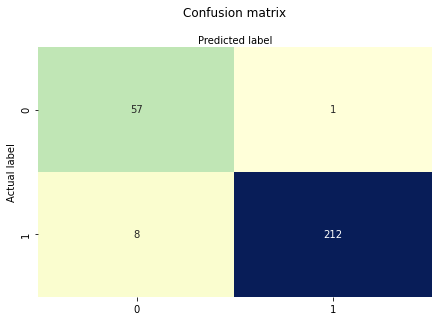

In [248]:
# Confusion Matrix :
cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(x_test))

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heatmap :
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', cbar = False)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [249]:
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(log_opt.score(x_test, y_test)*100))

Accuracy of Logistic Regression Classifier on test set: 96.76


In [250]:
# Classification Report :
log_opt.fit(x_train, y_train)
print(classification_report(y_test, log_opt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        58
           1       1.00      0.96      0.98       220

    accuracy                           0.97       278
   macro avg       0.94      0.97      0.95       278
weighted avg       0.97      0.97      0.97       278



In [251]:
log_opt.fit(x_train, y_train)
probs = log_opt.predict_proba(x_test)
probs = probs[:, 1]
logit_roc_auc = roc_auc_score(y_test, probs)
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.999


### 10.2) Random Forest Classifier :

In [252]:
rf_classifier = RandomForestClassifier(class_weight = "balanced",random_state=7)
param_grid = {'n_estimators': [50, 75, 100],
              'min_samples_split':[2,4,6],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15]}

grid_obj = GridSearchCV(rf_classifier,return_train_score=True,param_grid=param_grid,scoring='roc_auc',cv=10)

grid_fit = grid_obj.fit(x_train, y_train)
rf_opt = grid_fit.best_estimator_

print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)

best params: RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=3, random_state=7)
best params: {'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
best score: 0.999035131094888


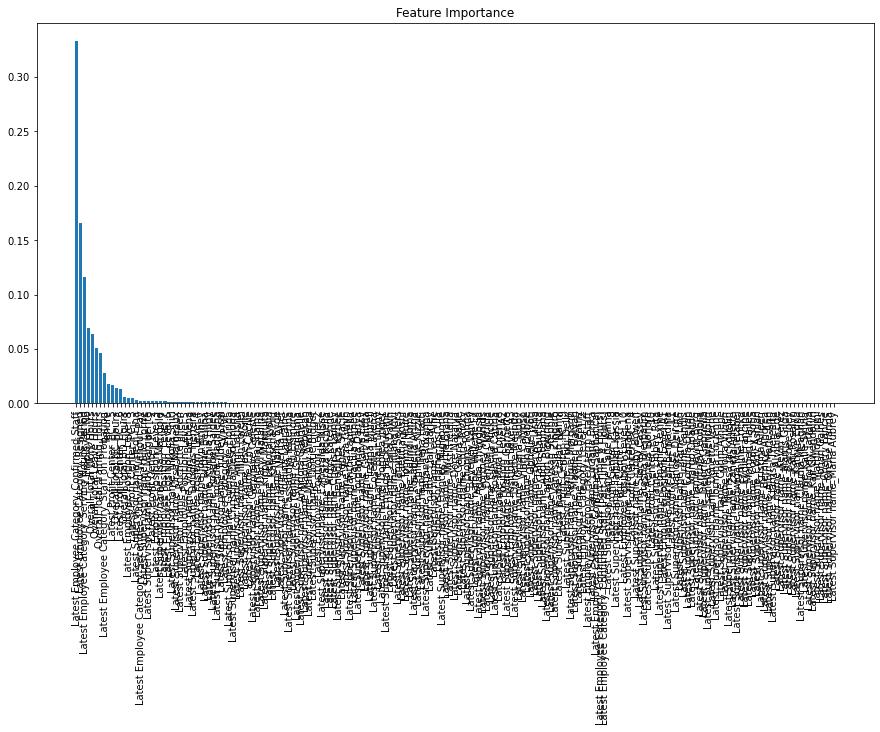

In [253]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1]
names = [x_train.columns[i] for i in indices]

plt.figure(figsize=(15, 7))
plt.title("Feature Importance")
plt.bar(range(x_train.shape[1]), importances[indices])
plt.xticks(range(x_train.shape[1]), names, rotation=90)
plt.show()

In [254]:
importances = rf_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(44):
    feat = x_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,Latest Employee Category_Confirmed Staff,0.333202
1,Latest Employee Category_Resigned,0.165532
2,Latest Employee Category_Serving Notice Period,0.116402
3,Employee No,0.069136
4,Overall Total Work Hours,0.063895
5,Overall Total Leave Hours,0.051075
6,Overall Total Training Hours,0.046303
7,Latest Employee Category_Staff on Probation,0.028106
8,Tenure,0.017442
9,Latest Profit Center_PC - 5,0.016897


In [255]:
rf_opt.predict(x_test)

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

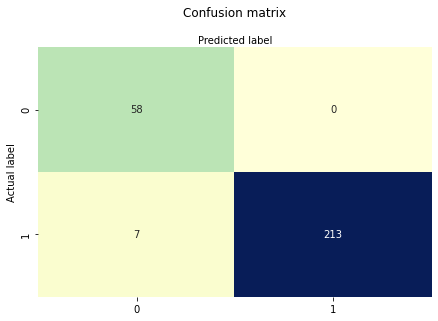

In [256]:
# Confusion Matrix :
cnf_matrix = metrics.confusion_matrix(y_test, rf_opt.predict(x_test))

class_names=[0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heatmap :
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g',cbar = False)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [257]:
print('Accuracy of RandomForest Regression Classifier on test set: {:.2f}'.format(rf_opt.score(x_test, y_test)*100))

Accuracy of RandomForest Regression Classifier on test set: 97.48


In [258]:
# Classification Report :
rf_opt.fit(x_train, y_train)
print(classification_report(y_test, rf_opt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        58
           1       1.00      0.97      0.98       220

    accuracy                           0.97       278
   macro avg       0.95      0.98      0.96       278
weighted avg       0.98      0.97      0.98       278



In [259]:
rf_opt.fit(x_train, y_train) # fit optimised model to the training data
probs = rf_opt.predict_proba(x_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_opt_roc_auc)

AUC score: 1.000


### ROC Graphs :

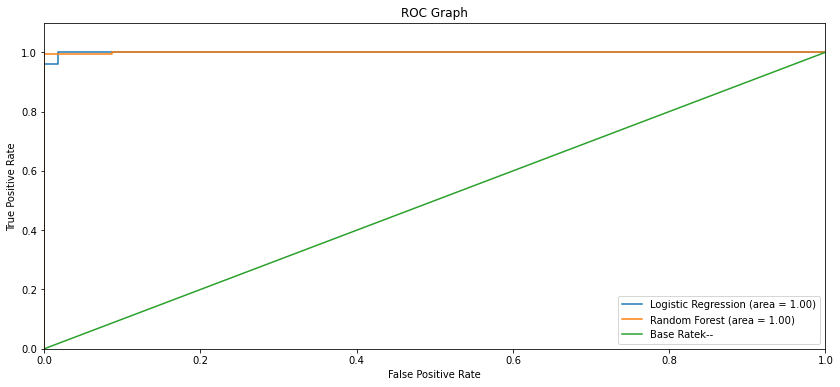

In [260]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(x_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(x_test)[:,1])

plt.figure(figsize=(14, 6))

# Logistic Regression ROC :
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Random Forest ROC :
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)


plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

# Risk Category :

In [261]:
# The Random Forest Classifier showed a higher AUC score compared to the Logistic Regression model. 

In [262]:
rf_opt.predict(x_test)

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [263]:
# Probability of Attrition :
y_prob = rf_opt.predict_proba(x_test)[:,0]

In [264]:
y_prob = pd.DataFrame(y_prob, columns=['Resigned Prob'])

In [265]:
Employee_No = x_test["Employee No"]

In [266]:
Employee_No = np.array(Employee_No)

In [267]:
Employee_No = pd.DataFrame(Employee_No, columns=['Employee No'])

In [268]:
result = pd.concat([Employee_No, y_prob], axis=1)

In [269]:
# Employees can be assigning a "Risk Category" based on the probability such that:

# Low-risk    : < 0.6
# Medium-risk :  between 0.6 and 0.8
# High-risk   : > 0.8

In [270]:
result["Risk Category"] = 0
for i in range(result.shape[0]) :
    if(result["Resigned Prob"][i]<0.6) :
        result["Risk Category"][i] = "Low-risk"
    elif((result["Resigned Prob"][i]>=0.6) and (result["Resigned Prob"][i]<=0.8)) :
        result["Risk Category"][i] = "Medium-risk"
    else :
        result["Risk Category"][i] = "High-risk"

In [271]:
result.head(10)

,Employee No,Resigned Prob,Risk Category
0,900,0.829118,High-risk
1,547,0.857768,High-risk
2,187,0.095565,Low-risk
3,847,0.138432,Low-risk
4,419,0.953274,High-risk
5,955,0.105490,Low-risk
6,1059,0.180597,Low-risk
7,689,0.092966,Low-risk
8,407,0.910086,High-risk
9,205,0.771117,Medium-risk


# Strategic Retention Plan :

In [272]:
df_HR.head()

,Employee No,Latest Current Status,Latest Employee Position,Latest Profit Center,Latest Employee Category,Latest Supervisor name,Overall Total Work Hours,Overall Total Leave Hours,Overall Total Training Hours,Overall Total BD Hours,Overall Total NC Hours,Tenure
0,1,Active,Level 1,PC - 1,SVP/VP,Idalina Lauraine,1084,404,97,2623,74,18
1,2,Active,Level 2,PC - 2,SVP/VP,Idalina Lauraine,1277,364,54,1294,1363,19
2,3,Active,Level 2,PC - 2,SVP/VP,Idalina Lauraine,2177,482,67,970,907,17
3,4,Resigned,Level 2,PC - 3,Resigned,Idalina Lauraine,546,404,32,2743,279,18
4,5,Active,Level 1,PC - 4,Level 1/2,Abagail Druci,149,104,3,1159,818,20


In [273]:
df_HR = df_HR[df_HR["Latest Current Status"]=="Resigned"]
df_HR.head()

,Employee No,Latest Current Status,Latest Employee Position,Latest Profit Center,Latest Employee Category,Latest Supervisor name,Overall Total Work Hours,Overall Total Leave Hours,Overall Total Training Hours,Overall Total BD Hours,Overall Total NC Hours,Tenure
3,4,Resigned,Level 2,PC - 3,Resigned,Idalina Lauraine,546,404,32,2743,279,18
7,8,Resigned,Level 4,PC - 3,Serving Notice Period,Tallia Eyde,97,216,0,1264,192,13
10,11,Resigned,Level 4,PC - 3,Serving Notice Period,Cacilia Aimee,720,88,0,0,888,13
14,15,Resigned,Level 4,PC - 3,Serving Notice Period,Barbee Joey,36,104,2,0,746,11
18,19,Resigned,Level 3,PC - 3,Resigned,Cacilia Aimee,378,468,0,20,1363,12


### Latest Employee Category :

In [274]:
df_HR["Latest Employee Category"].replace(to_replace="Confirmed Staff (Part-Time 4 Hours)", value="Confirmed Staff", inplace=True)
df_HR["Latest Employee Category"].replace(to_replace="Confirmed Staff (Part-Time 6 Hours)", value="Confirmed Staff", inplace=True)
df_HR["Latest Employee Category"].replace(to_replace="Confirmed-Sabbatical", value="Confirmed Staff", inplace=True)
df_HR["Latest Employee Category"].value_counts()

Resigned                 145
Serving Notice Period    130
Awaiting Termination       1
Staff on Probation         1
Name: Latest Employee Category, dtype: int64

In [275]:
cross_tab = pd.crosstab(df_HR["Latest Employee Category"],df_HR["Latest Current Status"])
# cross_tab

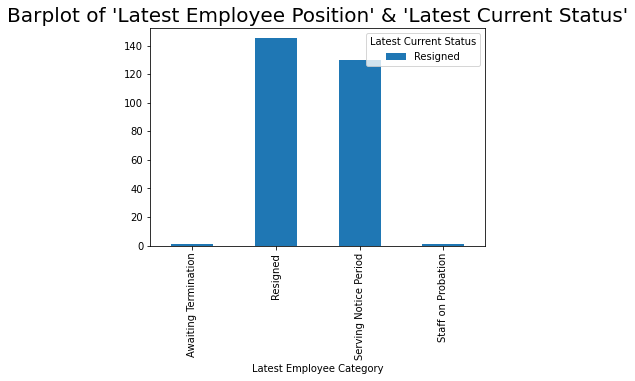

In [276]:
cross_tab.plot.bar(stacked=True)
plt.title("Barplot of 'Latest Employee Position' & 'Latest Current Status'", fontsize=20)
plt.show()

### Overall Total Work Hours :

<Figure size 720x720 with 0 Axes>

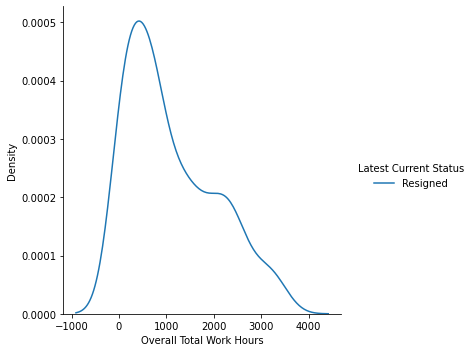

In [277]:
plt.figure(figsize=(10,10))
sns.displot(data=df_HR, x="Overall Total Work Hours", hue="Latest Current Status", kind="kde")
plt.show()

# Overall Total Training Hours :

<Figure size 1440x1440 with 0 Axes>

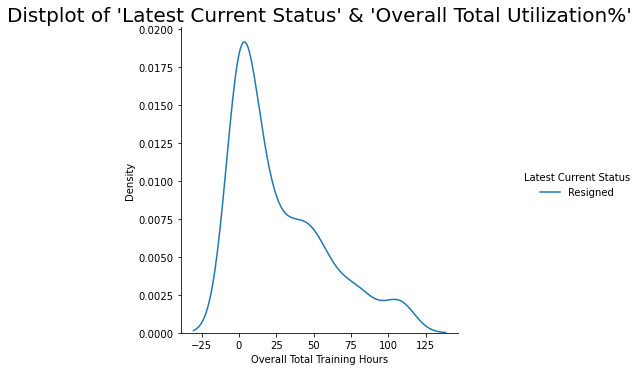

In [278]:
plt.figure(figsize=(20,20))
# sns.displot(data=data, x="Overall Total Utilization%", hue="Latest Current Status",kde=True)
sns.displot(data=df_HR, x="Overall Total Training Hours", hue="Latest Current Status", kind="kde")
plt.title("Distplot of 'Latest Current Status' & 'Overall Total Utilization%'", fontsize=20)
plt.show()

### Overall Total Leave Hours :

<Figure size 1440x1440 with 0 Axes>

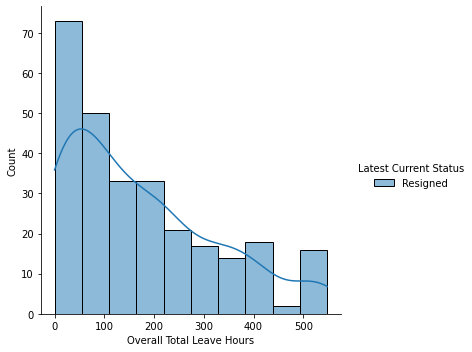

In [279]:
plt.figure(figsize=(20,20))
sns.displot(data=df_HR, x="Overall Total Leave Hours", hue="Latest Current Status",kde=True)
#sns.displot(data=df_HR, x="Overall Total Leave Hours%", hue="Latest Current Status", kind="kde")
plt.show()

### Overall Total NC Hours

<Figure size 1440x1440 with 0 Axes>

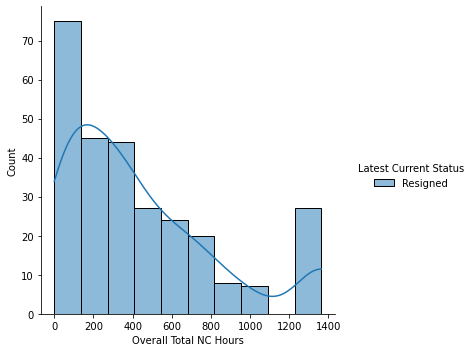

In [280]:
plt.figure(figsize=(20,20))
sns.displot(data=df_HR, x="Overall Total NC Hours", hue="Latest Current Status",kde=True)
plt.show()

### Tenure

<Figure size 1440x1440 with 0 Axes>

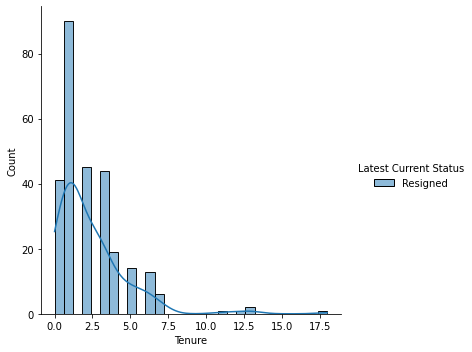

In [281]:
plt.figure(figsize=(20,20))
#sns.displot(data=df_HR, x="Tenure", hue="Latest Current Status", kind="kde")
sns.displot(data=df_HR, x="Tenure", hue="Latest Current Status",kde=True)
plt.show()

### Latest Profit Center

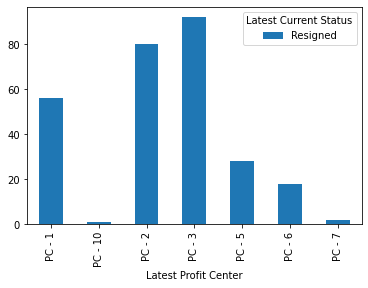

In [282]:
cross_tab = pd.crosstab(df_HR["Latest Profit Center"],df_HR["Latest Current Status"])
cross_tab.plot.bar(stacked=True)
plt.show()